# Step 1: Exploratory Data Analysis

---

## 1. Introduction📖 <a id="introduction"></a>

###  1.1 What is Diabetes?


###  1.2 Objective

## 2. Importing the necessary libraries📗<a id='importing'></a> 

In [64]:
# Imports library for data manipulation and visualisation
import sys
sys.path.append("../utilities")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from color import color
import warnings

# ignore all warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

## 3 Loading Dataset & Initial Insight📗<a id='loading'></a> 

In [65]:
df_train = pd.read_csv("../dataset/data_train.csv")
df_test = pd.read_csv("../dataset/data_test.csv")

### 3.1 Dataset Overview

In [66]:
print(color.BOLD + color.RED + "Columns Name:" + color.END)
columns = ', '.join(df_train.columns)
print(columns)

Columns Name:
Id, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income, ExtraMedTest, ExtraAlcoholTest, Status


In [4]:
df_train.dtypes

Id                      int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
ExtraMedTest            int64
ExtraAlcoholTest        int64
Status                  int64
dtype: object

All columns have the datatype int64, as data have been mapped to '0' and '1'. 



The target column that our model will try to predict is `Status` (0/1) which indicate if a person have no diabetes or diabetes/pre-diabetes

According to the data description, we have 25 columns from the datasets.
| Feature  | Data Type  | Data Description | Range  |
| ------------ | ------------ | ------------ | ------------ |
| Id  | int64  | Patient ID  | N/A  |
| Status  | int64  | 0 = no diabetes 1 = prediabetes or diabetes  |  0 - 1 |
| HighBP | int64  | 0 = no high blood pressure 1 = high blood pressure  | 0 - 1  |
| HighChol  | int64  | 0 = no high cholesterol 1 = high cholesterol  |  0 - 1 |
| CholCheck  | int64  | 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years   | 0 - 1  |
| BMI  | int64  | Body Mass Index  | N/A  |
| Smoker  | int64  | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes  | 0 - 1  |
| Stroke  | int64  | (Ever told) you had a stroke. 0 = no 1 = yes  | 0 - 1  |
| HeartDiseaseorAttack  | int64  | coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes  | 0 - 1  |
| PhysActivity  | int64  | physical activity in past 30 days - not including job 0 = no 1 = yes  | 0 - 1  |
| Fruits  | int64  |  Consume Fruit 1 or more times per day 0 = no 1 = yes | 0 - 1  |
| Veggies  |int64   | Consume Vegetables 1 or more times per day 0 = no 1 = yes  | 0 - 1  |
| HvyAlcoholConsump  |int64   | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes  |0 - 1   |
| AnyHealthcare  | int64  | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes  |  0 - 1 |
| NoDocbcCost  | int64  | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes  | 0 - 1  |
| GenHlth  | int64  | Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor  | 1 - 5  |
| MentHlth  | int64  | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days  | 1 - 30  |
| PhysHlth  | int64  | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days  | 1 - 30  |
| DiffWalk  | int64  | Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes   | 0 - 1  |
|  Sex | int64  | 0 = female 1 = male  | 0 - 1  |
| Age  | int64  | 13-level age category: 1 = 18-24 9 = 60-64 13 = 80 or older  | 1 - 13  |
| Education  | int64  | Education level: scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)  | 1 - 6  |
| Income  | int64  | Income scale: scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more  | 1 - 8  |
| ExtraMedTest  | int64  | The result of an extra medical test, range (-100, 100)  | -100 - 100  |
| ExtraAlcoholTest  | int64  | The result of an extra alcohol test, range (-100, 100)  | -100 - 100  |



As we can see, there are 2 different kind of data range, so let's divided them into 2 types base on their range to make it easier for data analysis:
- **Binary Categorical Values**: data that take values of 0 or 1, 
- **Numerical Values**: data that take values of a range of numbers, which can be discrete (Age, Income, ...) or continuous (BMI, GenHlth,...) values.

In [67]:
def is_binary_categorical(series):
    unique_values = series.unique()
    return len(unique_values) == 2 and set(unique_values) == {0, 1} # Total 2 uniques value and 2 values 0 and 1 

# Identify features with binary categorical data represented only by 0 and 1
binary_categorical_features = [column for column in df_train.columns if is_binary_categorical(df_train[column])]
# Identify remaining numerical features
numerical_features = [column for column in df_train.columns if column not in binary_categorical_features]

bin_count = str(len(binary_categorical_features))
rem_count = str(len(numerical_features))

print(color.BOLD + color.RED +"Features with binary categorical data represented only by 0 and 1 ("+bin_count+"):"+color.END, binary_categorical_features)
print(color.BOLD + color.RED +"Numerical features ("+rem_count+"):"+color.END, numerical_features)

Features with binary categorical data represented only by 0 and 1 (15): ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'Status']
Numerical features (10): ['Id', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income', 'ExtraMedTest', 'ExtraAlcoholTest']


In [6]:
print(color.BOLD + color.RED + 'Train Data Overview: ')
df_train.head(5)

Train Data Overview: 


,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,...,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,...,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,...,0,0,0,0,9,5,4,-58,0,0


In [7]:
print(color.BOLD + color.BLUE + 'Test Data Overview: ')
df_test.head(5)

Test Data Overview: 


,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,202944,1,1,1,30,1,0,1,1,1,...,3,0,0,1,11,4,7,0,-145,NaN
1,202945,0,0,1,27,1,0,0,0,0,...,0,30,1,1,13,2,5,28,-145,NaN
2,202946,0,0,1,21,0,0,0,1,1,...,0,5,0,0,10,6,8,-26,72,NaN
3,202947,0,0,1,24,1,0,0,1,1,...,0,30,0,0,9,6,7,0,0,NaN
4,202948,1,0,1,34,0,0,0,1,1,...,0,1,1,0,11,4,7,-73,-63,NaN


In [68]:
print(color.BOLD + color.RED + 'Training data shape:' + color.END)
print(df_train.shape)

print(color.BOLD + color.RED + 'Training data Duplication Row Count: ' + color.END)
print(df_train.duplicated().sum())

print(color.BOLD + color.RED +'Training data Duplication ID Count: ' + color.END)
print(df_train.duplicated(subset='Id').sum())

print(color.BOLD + color.RED +'Training data Null Value Count:' + color.END)
print(df_train.isna().sum())

Training data shape:
(202944, 25)
Training data Duplication Row Count: 
0
Training data Duplication ID Count: 
0
Training data Null Value Count:
Id                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64


Training dataset does not contain any null value for all features. So we do not need to do any data preprocessing to eliminate for modify the null value.

In [69]:
print(color.BOLD + color.BLUE + 'Test data shape:' + color.END)
print(df_test.shape)

print(color.BOLD + color.BLUE + 'Test data Duplication Row Count: ' + color.END)
print(df_test.duplicated().sum())

print(color.BOLD + color.BLUE +'Test data Duplication ID Count: ' + color.END)
print(df_test.duplicated(subset='Id').sum())

print(color.BOLD + color.BLUE +'Test data Null Value Count:' + color.END)
print(df_test.isna().sum())

Test data shape:
(50736, 25)
Test data Duplication Row Count: 
0
Test data Duplication ID Count: 
0
Test data Null Value Count:
Id                          0
HighBP                      0
HighChol                    0
CholCheck                   0
BMI                         0
Smoker                      0
Stroke                      0
HeartDiseaseorAttack        0
PhysActivity                0
Fruits                      0
Veggies                     0
HvyAlcoholConsump           0
AnyHealthcare               0
NoDocbcCost                 0
GenHlth                     0
MentHlth                    0
PhysHlth                    0
DiffWalk                    0
Sex                         0
Age                         0
Education                   0
Income                      0
ExtraMedTest                0
ExtraAlcoholTest            0
Status                  50736
dtype: int64


The test dataset doesn't have value for status, as this will be used to make the prediction and marked

In [10]:
df_train.describe()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,...,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,101471.500000,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,...,3.196971,4.256455,0.168707,0.439545,8.037449,5.050245,6.055641,-7.408660,-7.560041,0.175571
std,58585.030853,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,...,7.427247,8.736665,0.374494,0.496333,3.051568,0.985601,2.070140,75.993743,75.927137,0.380455
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,0.000000
25%,50735.750000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000,0.000000
50%,101471.500000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000
75%,152207.250000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,40.000000,40.000000,0.000000
max,202943.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,1.000000


In [11]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,202944.0,101471.500000,58585.030853,0.0,50735.75,101471.5,152207.25,202943.0
HighBP,202944.0,0.428700,0.494891,0.0,0.00,0.0,1.00,1.0
HighChol,202944.0,0.424344,0.494244,0.0,0.00,0.0,1.00,1.0
CholCheck,202944.0,0.962655,0.189607,0.0,1.00,1.0,1.00,1.0
BMI,202944.0,28.379824,6.612738,12.0,24.00,27.0,31.00,98.0
Smoker,202944.0,0.442634,0.496700,0.0,0.00,0.0,1.00,1.0
Stroke,202944.0,0.040844,0.197929,0.0,0.00,0.0,0.00,1.0
HeartDiseaseorAttack,202944.0,0.094391,0.292372,0.0,0.00,0.0,0.00,1.0
PhysActivity,202944.0,0.756302,0.429313,0.0,1.00,1.0,1.00,1.0
Fruits,202944.0,0.635372,0.481327,0.0,0.00,1.0,1.00,1.0


### 3.2 Numerical Value Analysis

For visualization the dataset distribution. Let remove the un-used column `ID`, and create 2 dataframe for binary categorical and numerical value by re-using the code above.

In [12]:
df_train = df_train.drop(columns=['Id']) 
df_test = df_test.drop(columns=['Id']) 

# Identify features with binary categorical data represented only by 0 and 1
binary_categorical_features = [column for column in df_train.columns if is_binary_categorical(df_train[column])]
# Identify remaining numerical features
numerical_features = [column for column in df_train.columns if column not in binary_categorical_features]

bin_count = str(len(binary_categorical_features))
rem_count = str(len(numerical_features))

binary_categorical_df = df_train[binary_categorical_features]
numerical_df = df_train[numerical_features]

print(color.BOLD + color.RED +"Features with binary categorical data represented only by 0 and 1 ("+bin_count+"):"+color.END, binary_categorical_features)
print(color.BOLD + color.RED +"Numerical features ("+rem_count+"):"+color.END, numerical_features)

Features with binary categorical data represented only by 0 and 1 (15): ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'Status']
Numerical features (9): ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income', 'ExtraMedTest', 'ExtraAlcoholTest']


Previously, we check that there are no null values in the dataset. However, there are a certain range for the numerical features as described in the dataset. So let's have a further check for minimum and maximum values.
|  Feature | Range |
| ------------ | ------------ |
|  BMI | No Range |
| GenHlth  |  1 - 5 |
| MentHlth  | 1 - 30  |
| PhysHlth  | 1 - 30  |
| Age  | 1 - 13  |
| Education  | 1 - 6  |
|  Income | 1 - 8  |
| ExtraMedTest  | -100 - 100  |
| ExtraAlcoholTest  |  -100 - 100 |


In [13]:
numerical_df.min()

BMI                  12
GenHlth               1
MentHlth              0
PhysHlth              0
Age                   1
Education             1
Income                1
ExtraMedTest       -199
ExtraAlcoholTest   -199
dtype: int64

In [14]:
numerical_df.max()

BMI                  98
GenHlth               5
MentHlth             30
PhysHlth             30
Age                  13
Education             6
Income                8
ExtraMedTest        199
ExtraAlcoholTest    199
dtype: int64

As we can see:

- `MentHlth` and `PhysHlth` have minimum value of `0`, which is out of range.

- `ExtraMedTest` and `ExtraAlcoholTest` have minimum value of `-199` and maximum value of `199`, which is out of range.

Theses values can be error in data collecting, or missing information. So let's check how many percent does these missing values contribute to the dataset.

In [15]:
cols = ['ExtraMedTest', 'ExtraAlcoholTest']
head = f"{'':16}{'Count Out of Range':>16}{'Percentage':>15}\n{'-' * 47}\n"
rows = ""
for col in cols:
    count_under_100 = len(df_train[df_train[col] < -100])
    count_over_100 = len(df_train[df_train[col] > 100])
    total_count = count_under_100 + count_over_100
    percentage = total_count / len(df_train) * 100
    rows += f"{col:16}{total_count:>16}{percentage:>14.2f}%\n"
print(head + rows)

                Count Out of Range     Percentage
-----------------------------------------------
ExtraMedTest               29515         14.54%
ExtraAlcoholTest           29464         14.52%



There are approximately **14.5%** data out of range, let's plot the distribution of these 2 features to examine further.

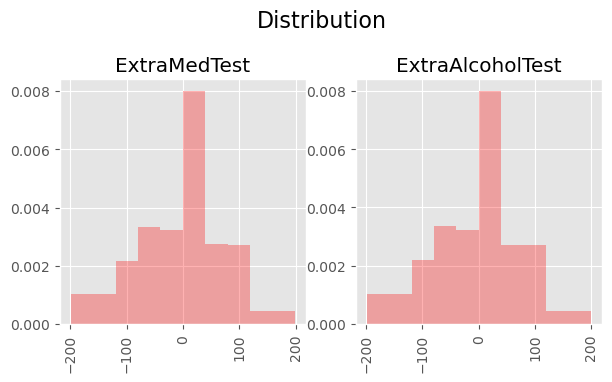

In [16]:
temp_df = numerical_df.drop(columns=['BMI', 'GenHlth', 'Age', 'Education', 'Income', 'MentHlth', 'PhysHlth'])


plt.figure(figsize=(7,7))
plt.suptitle("Distribution", fontsize=16, horizontalalignment='center')
count = 0
for i, col in enumerate(temp_df.columns):
    if col not in binary_categorical_features and col != "Id":
        plt.subplot(2,2,count+1)
        plt.hist(temp_df[col], alpha=0.3, color='r', density=True)
        plt.title(col)
        plt.xticks(rotation='vertical')
        count +=  1

As we can see, the data is distributed almost normally, with all kind of values ranging from -199 to 0 and 100 to 199. So this is **not likely to be a Random Missingness**. This problem maybe due to data collection error, but since the outlier is not some data points, but ranging evenly to make a sligtly normal distribution shape, so it is more likely due to **Inaccurate Description**, which the description might be outdated or simply incorrect, and the true range for these tests might be wider than originally specified.

So we can expand the true range of these 2 features to `-199` to `199`

In [17]:
cols = ['MentHlth', 'PhysHlth']
head = f"{'':10}{'Count 0':>10}{'Percentage':>15}\n{'-' * 35}\n"
rows = ""
for col in cols:
    zeroes_count = 0
    if 0 in df_train[col].value_counts().index:
        zeroes_count = df_train[col].value_counts()[0]
    missing_percentage = zeroes_count / len(df_train) * 100
    rows += f"{col:10}{zeroes_count:>10}{missing_percentage:>14.2f}%\n"
print(head + rows)

             Count 0     Percentage
-----------------------------------
MentHlth      140348         69.16%
PhysHlth      127988         63.07%



These 2 features, have significant amount of missing values of over **60%**. According to the data description:
```
Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
```

```
Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
```
It is understandable that this kind of question could lead to `0` if the persons did not have any mental/physical health problem, so it is likely to be a **Non-Random Missingness**, so data imputation techniques can introduce bias, so let's plot the distribution of these 2 values to make further evaluation.

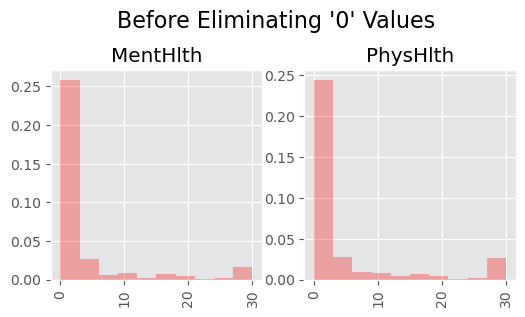

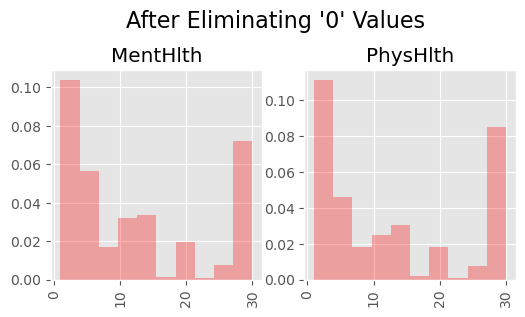

In [18]:
temp_df = numerical_df.drop(columns=['BMI', 'GenHlth', 'Age', 'Education', 'Income', 'ExtraMedTest', 'ExtraAlcoholTest'])


plt.figure(figsize=(6,6))
plt.suptitle("Before Eliminating '0' Values", fontsize=16, horizontalalignment='center')
count = 0
for i, col in enumerate(temp_df.columns):
    if col not in binary_categorical_features and col != "Id":
        plt.subplot(2,2,count+1)
        plt.hist(temp_df[col], alpha=0.3, color='r', density=True)
        plt.title(col)
        plt.xticks(rotation='vertical')
        count +=  1


temp_df = temp_df[temp_df['MentHlth'] != 0]
temp_df = temp_df[temp_df['PhysHlth'] != 0]

plt.figure(figsize=(6,6))
plt.suptitle("After Eliminating '0' Values", fontsize=16)
count = 0
for i, col in enumerate(temp_df.columns):
    if col not in binary_categorical_features and col != "Id":
        plt.subplot(2,2,count+1)
        plt.hist(temp_df[col], alpha=0.3, color='r', density=True)
        plt.title(col)
        plt.xticks(rotation='vertical')
        count +=  1


We can see that, after removing values with '0', there is still many datapoint, that distributed skewly around the range, and there are many values near 30, which could indicates bad health status. So removing those features could potentially remove important information for the model. And since, both Mental Health [[1]] and Physical Health [[2]] problem have correlation with diabetes, we should not remove any features

[1]: https://www.cdc.gov/diabetes/managing/mental-health.html#:~:text=The%20Mind%2DBody%20Connection,make%20mental%20health%20issues%20worse.

[2]: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8800622/

Also we could not determine clear categories or this context (e.g.: we cannot say a person with 5 days of physical health problem is one with good health, like in GenHlth description) So let's convert these columns into binary categorical values with the threshold of `3`

| Range  | Health Type  | Value  |
| ------------ | ------------ | ------------ |
| 0 - 3 | Healthy (No health issue) |  0 |
| 4 - 30  | Unhealthy (Health issue) | 1  |

For consistency of the model to be able to generalize, and understand the new data type, the conversion should also applied to the test dataset.

In [19]:
def convert_to_binary(value):
    value = int(value)
    if value <= 3:
        return 0
    else:
        return 1

df_train['MentHlth'] = df_train['MentHlth'].apply(convert_to_binary)
df_train['PhysHlth'] = df_train['PhysHlth'].apply(convert_to_binary)
df_test['MentHlth'] = df_test['MentHlth'].apply(convert_to_binary)
df_test['PhysHlth'] = df_test['PhysHlth'].apply(convert_to_binary)

df_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,1,24,1,0,0,1,0,1,...,0,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,1,1,...,0,0,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,1,0,...,1,1,1,0,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,0,1,1,27,0,0,0,1,0,1,...,0,0,0,0,9,5,4,-58,0,0


In [20]:
df_train['MentHlth'].value_counts()

MentHlth
0    163543
1     39401
Name: count, dtype: int64

In [21]:
df_train['PhysHlth'].value_counts()

PhysHlth
0    155708
1     47236
Name: count, dtype: int64

In [22]:
binary_categorical_features = [column for column in df_train.columns if is_binary_categorical(df_train[column])]
numerical_features = [column for column in df_train.columns if column not in binary_categorical_features]

bin_count = str(len(binary_categorical_features))
rem_count = str(len(numerical_features))

binary_categorical_df = df_train[binary_categorical_features]
numerical_df = df_train[numerical_features]

binary_categorical_df_test = df_test[binary_categorical_features]
numerical_df_test = df_test[numerical_features]

print(color.BOLD + color.RED + "Update the 2 dataframes:" + color.END)
print(color.BOLD + color.RED +"Features with binary categorical data represented only by 0 and 1 ("+bin_count+"):"+color.END, binary_categorical_features)
print(color.BOLD + color.RED +"Numerical features ("+rem_count+"):"+color.END, numerical_features)

Update the 2 dataframes:
Features with binary categorical data represented only by 0 and 1 (17): ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Status']
Numerical features (7): ['BMI', 'GenHlth', 'Age', 'Education', 'Income', 'ExtraMedTest', 'ExtraAlcoholTest']


### 3.3 Categorical Value Analysis

| Feature  | 0  | 1  |
| ------------ | ------------ | ------------ |
| HighBP | No  | Yes  |
| HighChol  | No  | Yes  |
|  CholCheck | No  | Yes  |
|  Smoker | No  |  Yes |
|  Stroke | No  | Yes  |
|  HeartDiseaseorAttack | No  |  Yes |
| PhysActivity  | No  | Yes  |
| Fruits  | No  |  Yes |
| Veggies  | No  |  Yes |
| HvyAlcoholConsump  | No  |Yes   |
| AnyHealthcare  | No  | Yes  |
| NoDocbcCost  | No  |  Yes |
| MentHlth  | No  | Yes  |
| PhysHlth  | No  | Yes  |
| DiffWalk  | No  |  Yes |
| Sex  |  Female | Male  |
| Status  |  No | Yes  |

In [23]:
binary_categorical_df.min()

HighBP                  0
HighChol                0
CholCheck               0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Status                  0
dtype: int64

In [24]:
binary_categorical_df.max()

HighBP                  1
HighChol                1
CholCheck               1
Smoker                  1
Stroke                  1
HeartDiseaseorAttack    1
PhysActivity            1
Fruits                  1
Veggies                 1
HvyAlcoholConsump       1
AnyHealthcare           1
NoDocbcCost             1
MentHlth                1
PhysHlth                1
DiffWalk                1
Sex                     1
Status                  1
dtype: int64

As we see that there are no value out of the range 0 and 1, and as we known previously there are no null value, so the categorical value do not have any missing data or error.

## 4 Dataset Distribution📗<a id='loading'></a> 

### 4.1 Dataset Target Distribution

                       Male  Female   Total
With Diabetes (1)     16591   19040   35631
Without Diabetes (0)  72612   94701  167313

Percentage of people with diabetes:
Male: 18.60%
Female: 16.74%
Total: 17.56%


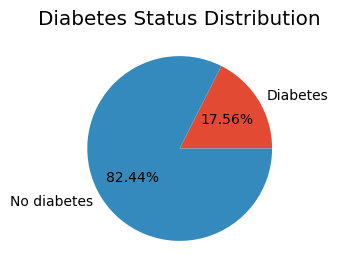

In [25]:

# Count males with and without diabetes
male_counts = df_train[df_train['Sex'] == 1]['Status'].value_counts().sort_index()

# Count females with and without diabetes
female_counts = df_train[df_train['Sex'] == 0]['Status'].value_counts().sort_index()

# Create a DataFrame
data = {
    'Male': [male_counts[1], male_counts[0]],
    'Female': [female_counts[1], female_counts[0]]
}

index = ['With Diabetes (1)', 'Without Diabetes (0)']

df_counts = pd.DataFrame(data, index=index)

df_counts['Total'] = df_counts.sum(axis=1)

print(df_counts)

total_diabetes = male_counts[0] + male_counts[1] + female_counts[0] + female_counts[1]
print()
print(color.BOLD + color.RED + "Percentage of people with diabetes:" + color.END)
print("Male: {:.2f}%".format(male_counts[1]/ (male_counts[1]+male_counts[0]) * 100))
print("Female: {:.2f}%".format(female_counts[1]/ (female_counts[1]+female_counts[0]) * 100))
print("Total: {:.2f}%".format((male_counts[1]+female_counts[1])/total_diabetes * 100))

# Pie Graph
labels = ['Diabetes', 'No diabetes']
sizes = [male_counts[1]+female_counts[1], total_diabetes- (male_counts[1]+female_counts[1])]
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%.2f%%')
plt.title('Diabetes Status Distribution')
plt.show()


The percentage of a person getting diabetes or prediabetes vary between 16.74% ~ 18.60%, with the avarage value of 17,56%, which is a very small difference between male and female. We can conclude that sex, is likely not a big factor that contribute to a person getting diabetes.

However, the dataset is heavily imbalance, where it is made up of **17.56% (1)** and **82.44% (0)**. This imbalanced will cause a bias toward the majority class for the prediction result, which likely to produce very high accuracy in training, but not performing well in the real world.  

To handle this imbalance dataset problem, there are 3 techniques we can apply:
- Over Sampling:
 - Random Oversampling 
 - SMOTE (Synthetic Minority Oversampling Technique)
- Under Sampling
------------
Undersampling techniques randomly removing data from the majority class to achieve balance, and reduce computational power, but it produce alot of information loss in this case where majority class is overwhelm, and will introduce underfitting

Oversampling techniques generate new values for the minority class to balance out the dataset, this approach will not discard any datapoint and retain all information present in the original dataset. However it may increase computational cost. There are 2 techiniques Random Oversampling and SMOTE. 

Random Oversampling is simpler to implement, it replicate random data from the dataset, increase the dataset, but keep the variety. So there is risk of overfitting, if done excessiely

SMOTE generate new data based on existing minority samples, it can resolve overfitting issue, increase model genaralization, but potentially introducing noise. So it is more complex to implement and required carful parameter selection and finetuning.

------------
-> Given the big imbalance, we should oversampling the minority class and undersampling the majority class simultaneously, so it's possible to achieve better class balance while minimizing the risk of overfitting or underfitting.
And benchmark the performance of both Random oversampling vs SMOTE

### 4.2 Dataset Binary Categorical Data Distribution

In [26]:
conditions = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Status']

counts = {}

# Loop through conditions to count
for condition in conditions:
    condition_counts = df_train[condition].value_counts().sort_index()
    total_count = condition_counts.sum()
    
    # Calculate percentages
    yes_percentage = (condition_counts[1] / total_count) * 100
    no_percentage = (condition_counts[0] / total_count) * 100
    
    # Store the counts and percentages in the dictionary
    counts[condition] = [f"{condition_counts[0]} ({no_percentage:.2f}%)", f"{condition_counts[1]} ({yes_percentage:.2f}%)"]

df_counts = pd.DataFrame(counts, index=['No (0)', 'Yes (1)'])
df_counts_transposed = df_counts.T

print(color.BOLD + color.RED + "Train Dataset Binary Categorical Value Distribution:\n" + color.END)
print(df_counts_transposed)

conditions = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex']

counts = {}

# Loop through conditions to count
for condition in conditions:
    condition_counts = df_test[condition].value_counts().sort_index()
    total_count = condition_counts.sum()
    
    # Calculate percentages
    yes_percentage = (condition_counts[1] / total_count) * 100
    no_percentage = (condition_counts[0] / total_count) * 100
    
    # Store the counts and percentages in the dictionary
    counts[condition] = [f"{condition_counts[0]} ({no_percentage:.2f}%)", f"{condition_counts[1]} ({yes_percentage:.2f}%)"]

df_counts = pd.DataFrame(counts, index=['No (0)', 'Yes (1)'])
df_counts_transposed = df_counts.T

print(color.BOLD + color.BLUE + "\nTest Dataset Binary Categorical Value Distribution" + color.END)
print(df_counts_transposed)


Train Dataset Binary Categorical Value Distribution:

                               No (0)          Yes (1)
HighBP                115942 (57.13%)   87002 (42.87%)
HighChol              116826 (57.57%)   86118 (42.43%)
CholCheck                7579 (3.73%)  195365 (96.27%)
Smoker                113114 (55.74%)   89830 (44.26%)
Stroke                194655 (95.92%)     8289 (4.08%)
HeartDiseaseorAttack  183788 (90.56%)    19156 (9.44%)
PhysActivity           49457 (24.37%)  153487 (75.63%)
Fruits                 73999 (36.46%)  128945 (63.54%)
Veggies                38251 (18.85%)  164693 (81.15%)
HvyAlcoholConsump     191597 (94.41%)    11347 (5.59%)
AnyHealthcare            9834 (4.85%)  193110 (95.15%)
NoDocbcCost           185959 (91.63%)    16985 (8.37%)
MentHlth              163543 (80.59%)   39401 (19.41%)
PhysHlth              155708 (76.72%)   47236 (23.28%)
DiffWalk              168706 (83.13%)   34238 (16.87%)
Sex                   113741 (56.05%)   89203 (43.95%)
Status     

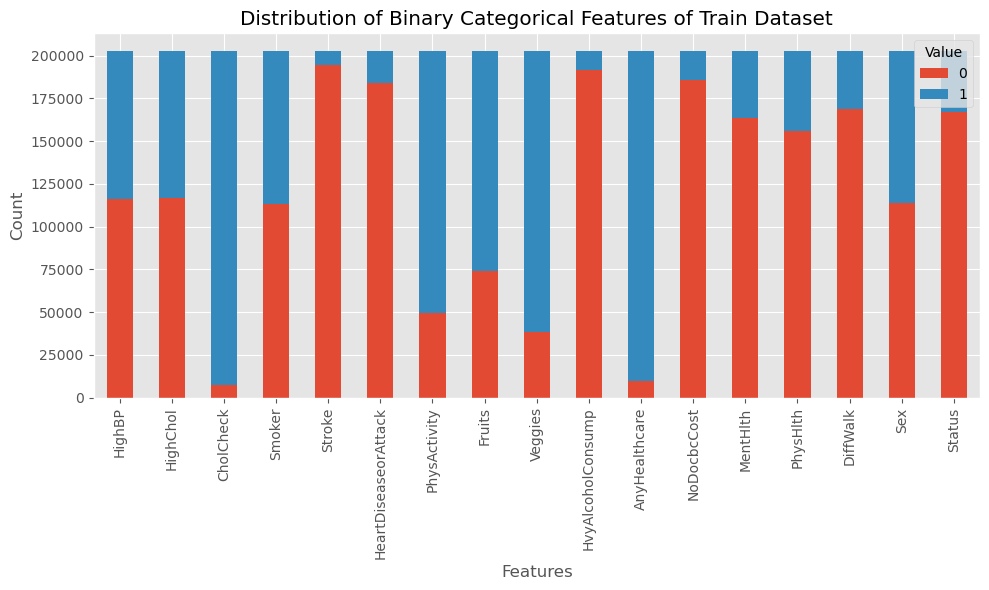

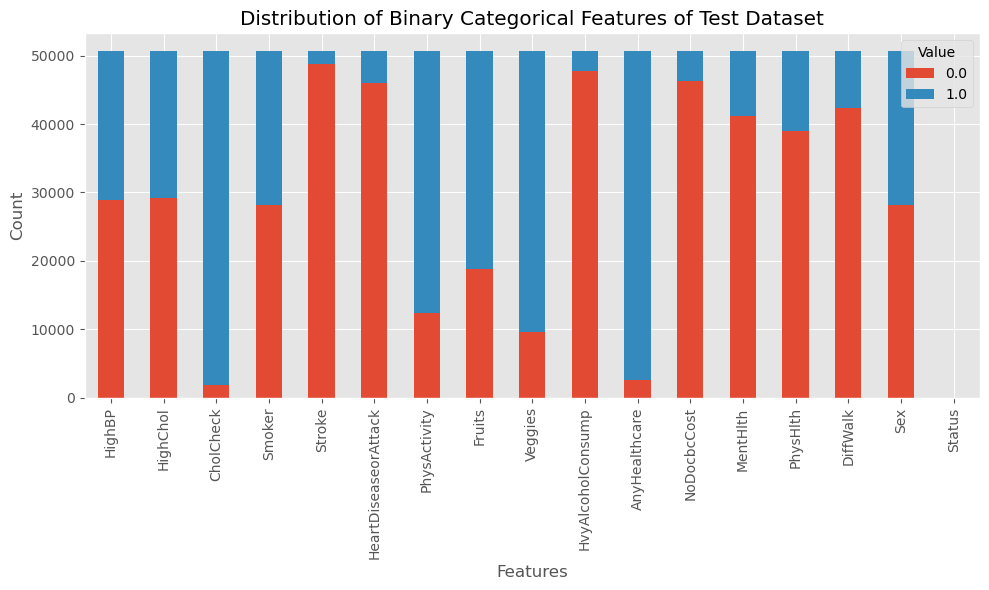

In [27]:
# Count occurrences of each category for all binary categorical features
binary_counts = binary_categorical_df.apply(pd.value_counts)
# Transpose the DataFrame for plotting
binary_counts = binary_counts.transpose()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
binary_counts.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Distribution of Binary Categorical Features of Train Dataset')
ax.set_xlabel('Features')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Value', loc='upper right')
plt.tight_layout()
plt.show()

# Plotting for test dataset
binary_counts = binary_categorical_df_test.apply(pd.value_counts)
binary_counts = binary_counts.transpose()

fig, ax = plt.subplots(figsize=(10, 6))
binary_counts.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Distribution of Binary Categorical Features of Test Dataset')
ax.set_xlabel('Features')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Value', loc='upper right')
plt.tight_layout()
plt.show()

**Relationship between train and test dataset**:  Both train and test dataset have very similar distribution, and some of the features is fairly balanced.
 - Column `CholCheck` have severe imbalanced distribution, and this columns indicates a cholesterol check in 5 years, which is not very meaningful in term of the up-to-date of data. Beside we already have `HighChol`, that indicates high cholesterol, and is balanced. So we should remove `CholCheck`
 - `AnyHealthcare` and `NoDocbcCost` also have severe imbalance, they also indicate kind of the same meaning, however `NoDocbcCost` is more straightforward, and may have a weak correlation to growing diabetes, because of missing doctor checkup (A person with healthcare coverage - `AnyHealthcare` , may or may not attend doctor meetup) . So we should remove `AnyHealthcare`


| Column  | Data Distribution  | Conclusion  | Source of Correlation |
| ------------ | ------------ | ------------ | ------------ |
| HighBP  | Data is balanced, slightly skew toward '0'  | No further processing required  | [MedicalNewsToday](https://www.medicalnewstoday.com/articles/317220 "MedicalNewsToday") |
| HighChol  | Data is balanced, slightly skew toward '0'  | No further processing required  | [American Heart Association](https://www.heart.org/en/health-topics/diabetes/diabetes-complications-and-risks/cholesterol-abnormalities--diabetes "American Heart Association") |
| CholCheck | Data is heavily skew toward '1'  - High Cholesterol | **Remove**  | |
|  Smoker | Data is balanced, slightly skew toward '0'  | No further processing required  | [CDC](http://https://www.cdc.gov/tobacco/campaign/tips/diseases/diabetes.html#:~:text=We%20now%20know%20that%20smoking%20is%20one%20cause%20of%20type%202%20diabetes.&text=In%20fact%2C%20people%20who%20smoke,people%20who%20don't%20smoke.&text=People%20with%20diabetes%20who%20smoke,and%20with%20managing%20their%20condition. "CDC") |
| Stroke  | Data is heavily skew toward '0'  | No further processing required  | [American Stroke Association](https://www.stroke.org/-/media/Stroke-Files/Lets-Talk-About-Stroke/Prevention/Lets-Talk-About-the-Connection-Between-Diabetes-and-Stroke.pdf "American Stroke Association") |
| HeartDiseaseorAttack  | Data is heavily skew toward '0'   | No further processing required  | [CDC](https://www.cdc.gov/diabetes/library/features/diabetes-and-heart.html "CDC") |
| PhysActivity  | Data is skew toward '1'   | No further processing required  | [NIH](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2807936/ "NIH") |
| Fruits  | Data is skew toward '1'   | No further processing required  | [MedicalNewsToday](https://www.medicalnewstoday.com/articles/323310 "MedicalNewsToday") |
| Veggies  | Data is heavily skew toward '1'   | No further processing required  | [MedicalNewsToday](https://www.medicalnewstoday.com/articles/323310 "MedicalNewsToday") |
| HvyAlcoholConsump  | Data is heavily skew toward '0'   | No further processing required  | [American Stroke Association](https://diabetes.org/health-wellness/alcohol-and-diabetes "American Stroke Association") |
| AnyHealthcare  | Data is heavily skew toward '1'   | **Remove**  | |
| NoDocbcCost  | Data is heavily skew toward '1'   | No further processing required  | |
| MentHlth  | Data is skew toward '0'   | No further processing required  | [Diabetes UK](https://www.diabetes.org.uk/guide-to-diabetes/emotions/stress#:~:text=Stress%20alone%20doesn't%20cause,amount%20of%20insulin%20they%20make. "Diabetes UK") |
| PhysHlth  | Data is skew toward '0'  | No further processing required  | [WHO](https://www.who.int/news-room/fact-sheets/detail/diabetes#:~:text=Factors%20that%20contribute%20to%20developing,tests%20with%20a%20healthcare%20provider. "WHO") |
| DiffWalk  | Data is skew toward '0'  | No further processing required  | [NIH](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5886546/ "NIH") |
| Sex  |  Data is balanced, slightly skew toward '1'  | No further processing required  | |
| Status  | Data is heavily skew toward '0'  | **Imbalance, must be balance before training to avoid bias**  |  | 

In [28]:
df_train.drop(columns=['CholCheck','AnyHealthcare'])
df_test.drop(columns=['CholCheck','AnyHealthcare'])

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,1,1,30,1,0,1,1,1,1,0,...,0,0,0,1,11,4,7,0,-145,NaN
1,0,0,27,1,0,0,0,0,1,0,...,0,1,1,1,13,2,5,28,-145,NaN
2,0,0,21,0,0,0,1,1,1,0,...,0,1,0,0,10,6,8,-26,72,NaN
3,0,0,24,1,0,0,1,1,1,0,...,0,1,0,0,9,6,7,0,0,NaN
4,1,0,34,0,0,0,1,1,0,0,...,0,0,1,0,11,4,7,-73,-63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50731,1,0,38,0,0,0,1,1,0,0,...,0,0,0,0,8,6,7,43,22,NaN
50732,0,1,24,0,0,0,1,0,1,1,...,1,0,0,0,10,6,7,-6,-67,NaN
50733,1,1,31,0,0,1,1,1,1,0,...,0,0,1,0,13,5,3,34,100,NaN
50734,1,1,24,1,0,0,0,0,1,1,...,0,0,1,1,11,5,7,189,100,NaN


### 4.3 Dataset Numerical Data Distribution

We will plot a histogram for each numerical column of our datasets to observe the data distribution along with the KDE lines to examine the shape/type of distribution.

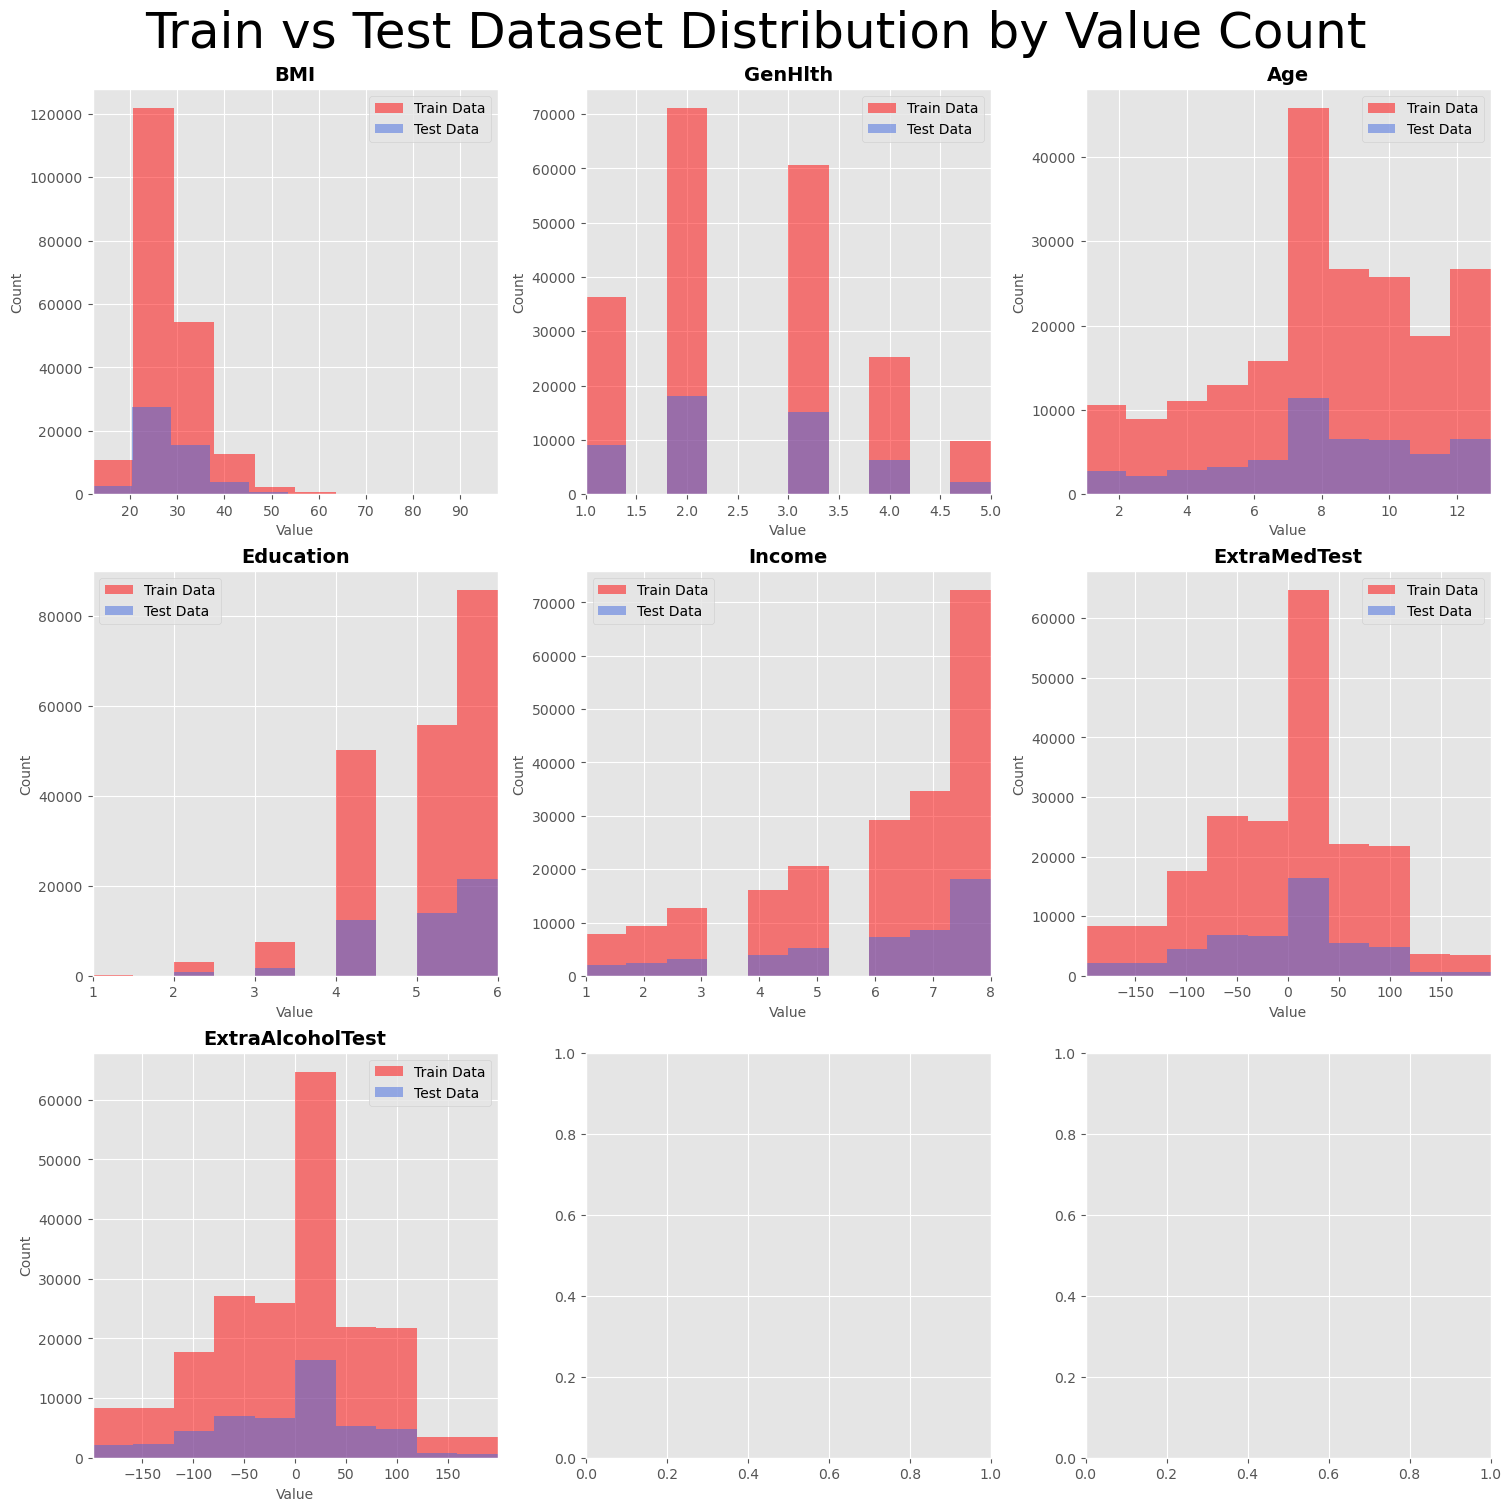

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), constrained_layout=True)
axes = axes.ravel()
fig.suptitle("Train vs Test Dataset Distribution by Value Count", fontsize=36)

for i, col in enumerate(numerical_df.columns):
    axes[i].hist(numerical_df[col], color="r", alpha=0.5, label="Train Data"
    )

    axes[i].hist(
        numerical_df_test[col], color="royalblue", alpha=0.5, label="Test Data"
    )

    axes[i].set_ylabel("Count", fontsize=10)
    axes[i].set_xlabel("Value", fontsize=10)
    axes[i].set_xlim(left=min(numerical_df_test[col].min(), numerical_df_test[col].min()),
                        right=max(numerical_df[col].max(), numerical_df[col].max()))
    axes[i].tick_params(axis="both", which="major", labelsize=10)
    axes[i].set_title(col, fontsize=14, fontweight="bold")
    axes[i].legend()

plt.show()


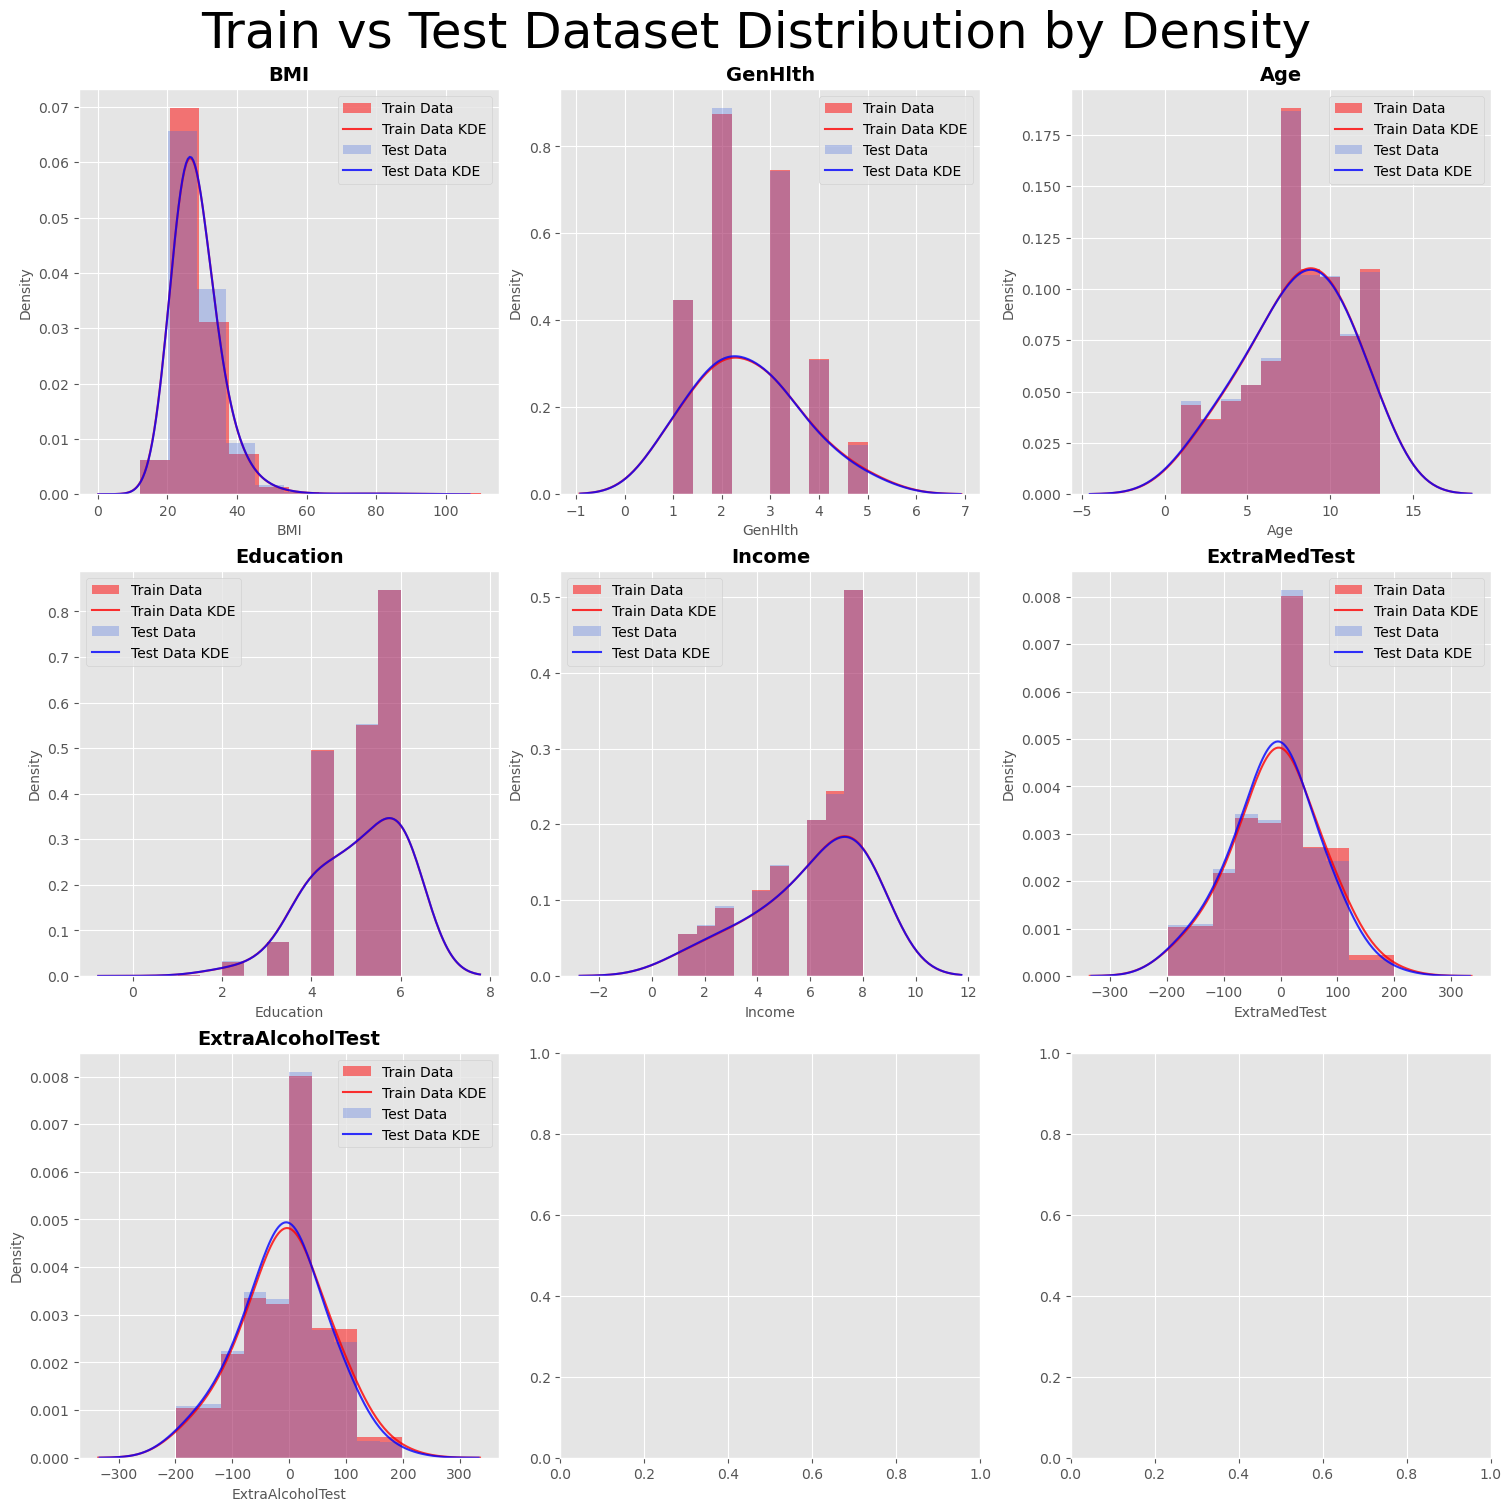

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), constrained_layout=True)
axes = axes.ravel()
fig.suptitle("Train vs Test Dataset Distribution by Density", fontsize=36)

for i, col in enumerate(numerical_df.columns):
    axes[i].hist(
        numerical_df[col], color="r", density=True, alpha=0.5, label="Train Data"
    )
    sns.kdeplot(numerical_df[col], ax=axes[i], color="red", alpha=0.8, label="Train Data KDE", bw_method=0.6)

    axes[i].hist(
        numerical_df_test[col], color="royalblue", density=True, alpha=0.3, label="Test Data"
    )
    sns.kdeplot(numerical_df_test[col], ax=axes[i], color="blue", alpha=0.8, label="Test Data KDE", bw_method=0.6)

    axes[i].set_ylabel("Density", fontsize=10)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].tick_params(axis="both", which="major", labelsize=10)
    axes[i].set_title(col, fontsize=14, fontweight="bold")
    axes[i].legend()

plt.show()

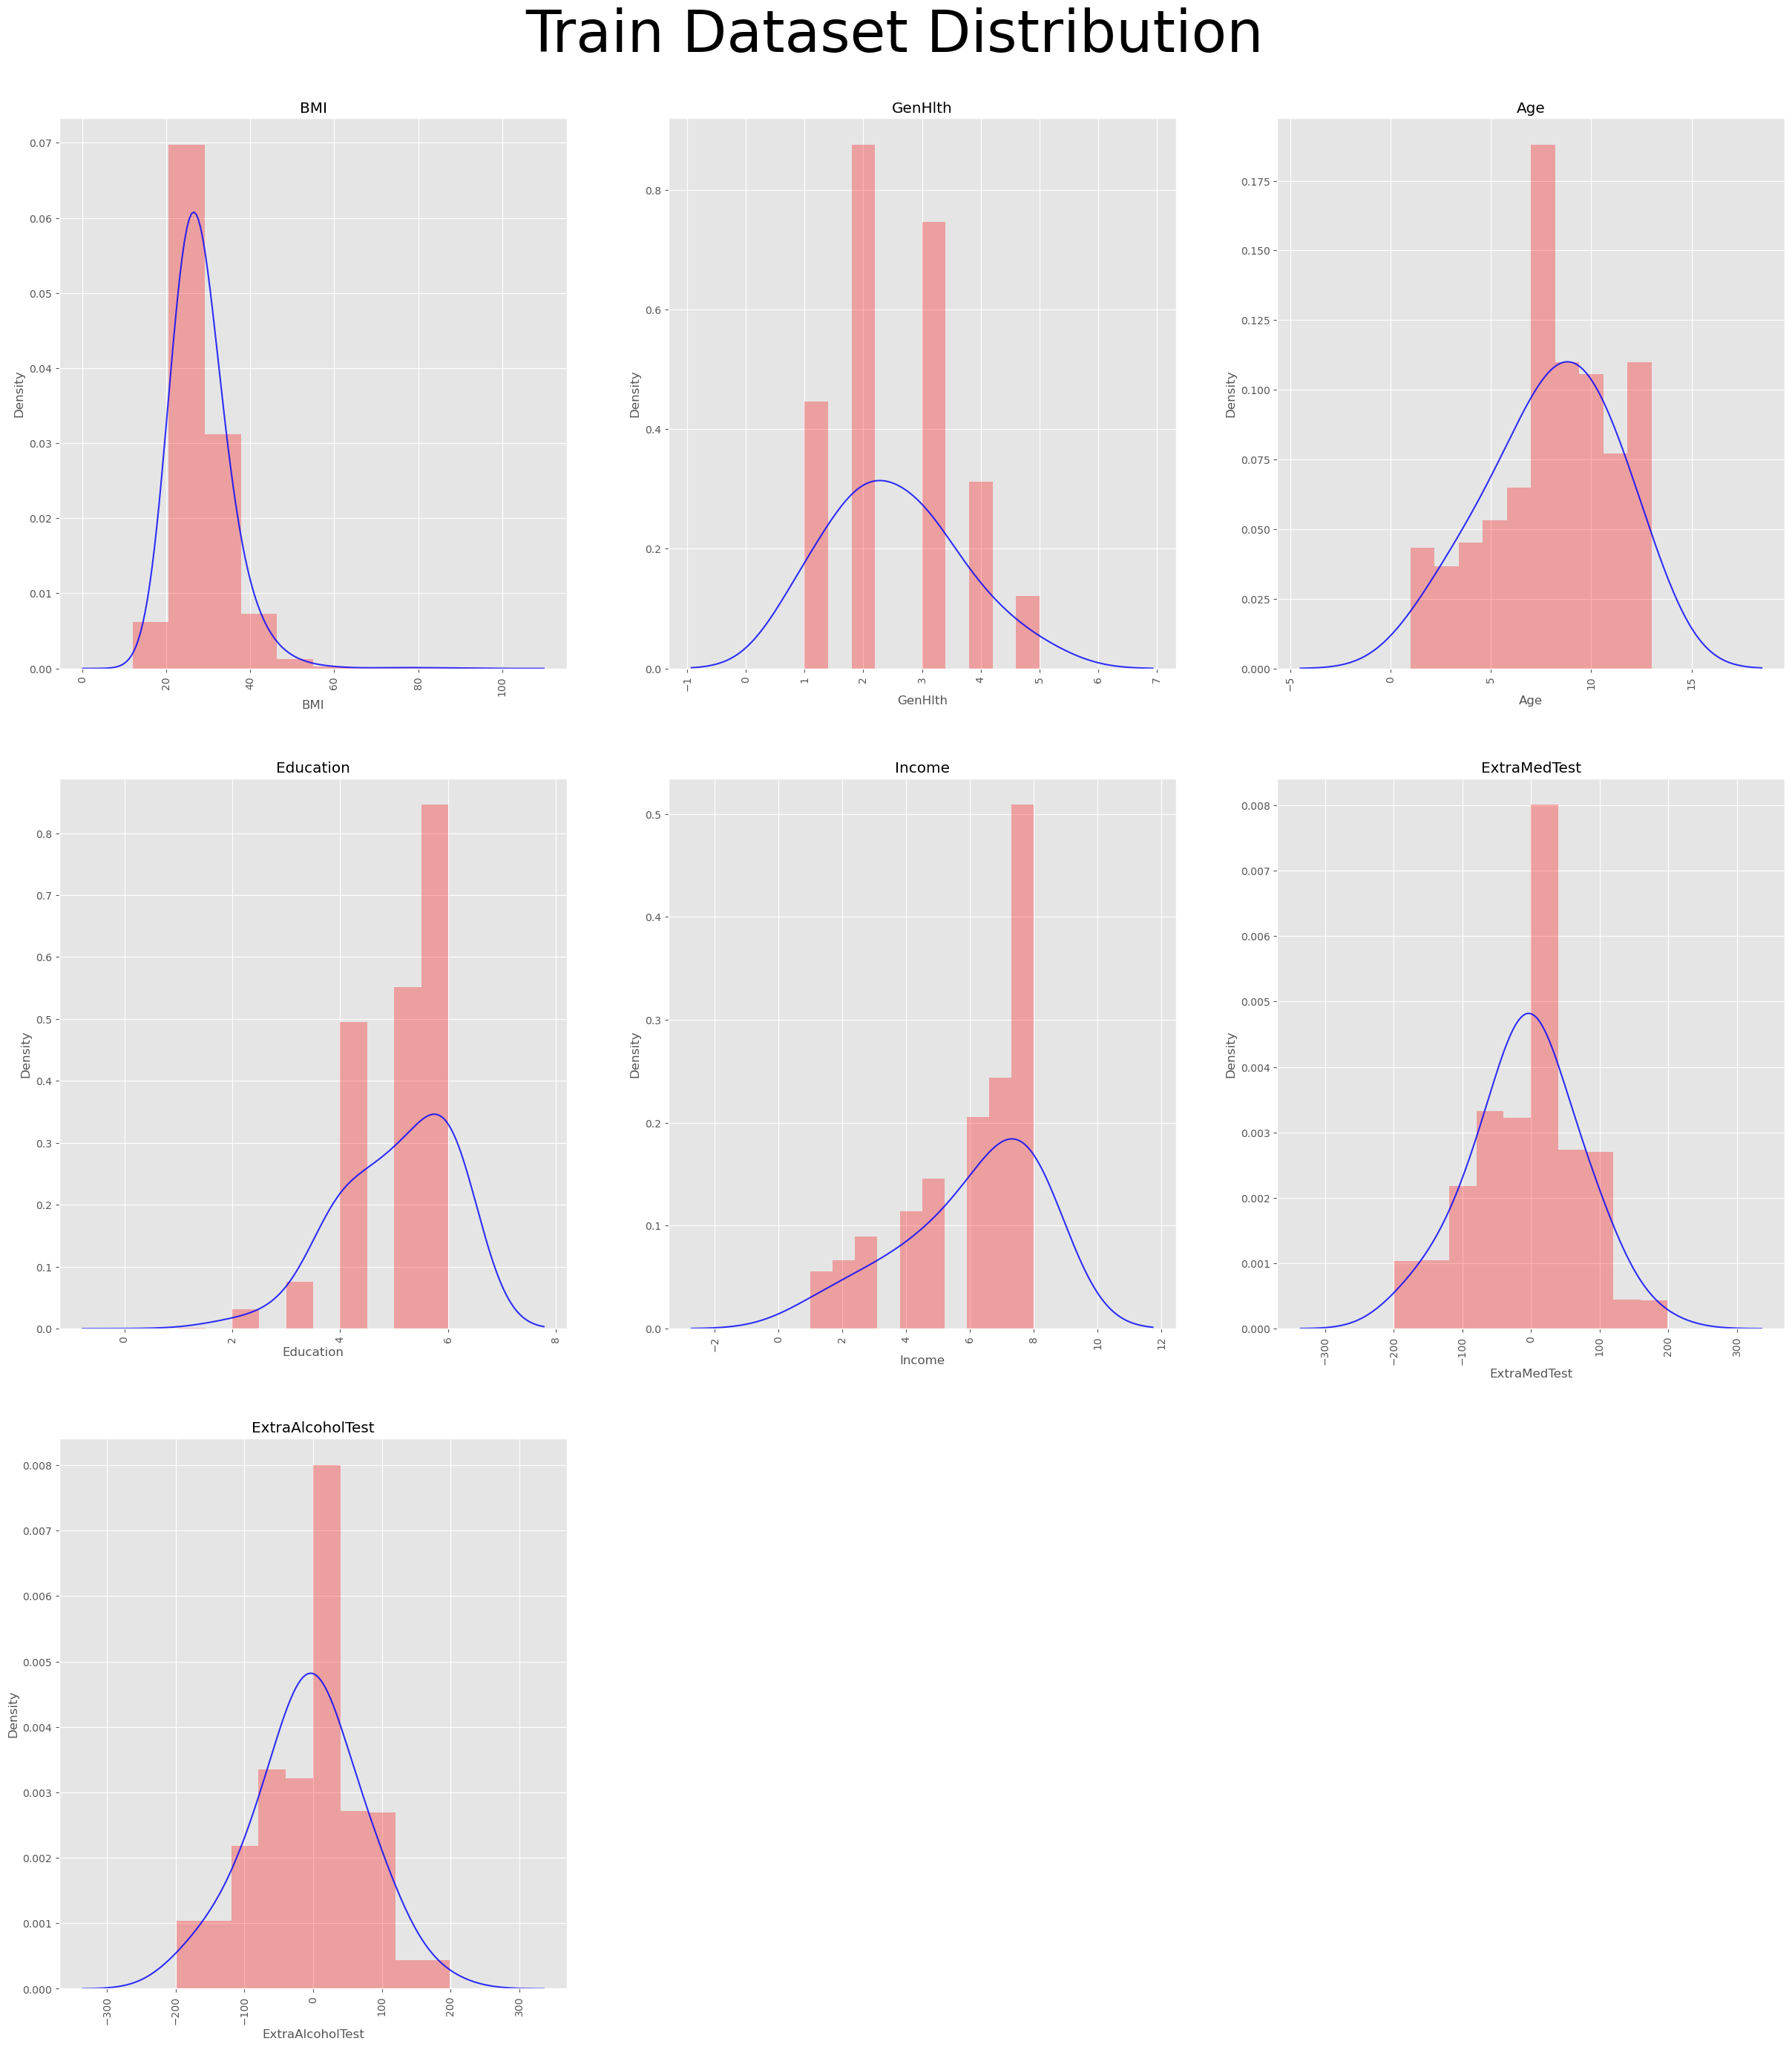

In [31]:
plt.figure(figsize=(30,30))
plt.suptitle("Train Dataset Distribution", fontsize=56, y=1.0)
count = 0
for i, col in enumerate(numerical_df.columns):
    plt.subplot(3,3,count+1)
    plt.subplots_adjust(top=0.95)
    plt.hist(numerical_df[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
    count += 1
    sns.kdeplot(numerical_df[col], color="blue", alpha=0.8, bw_method=0.6)

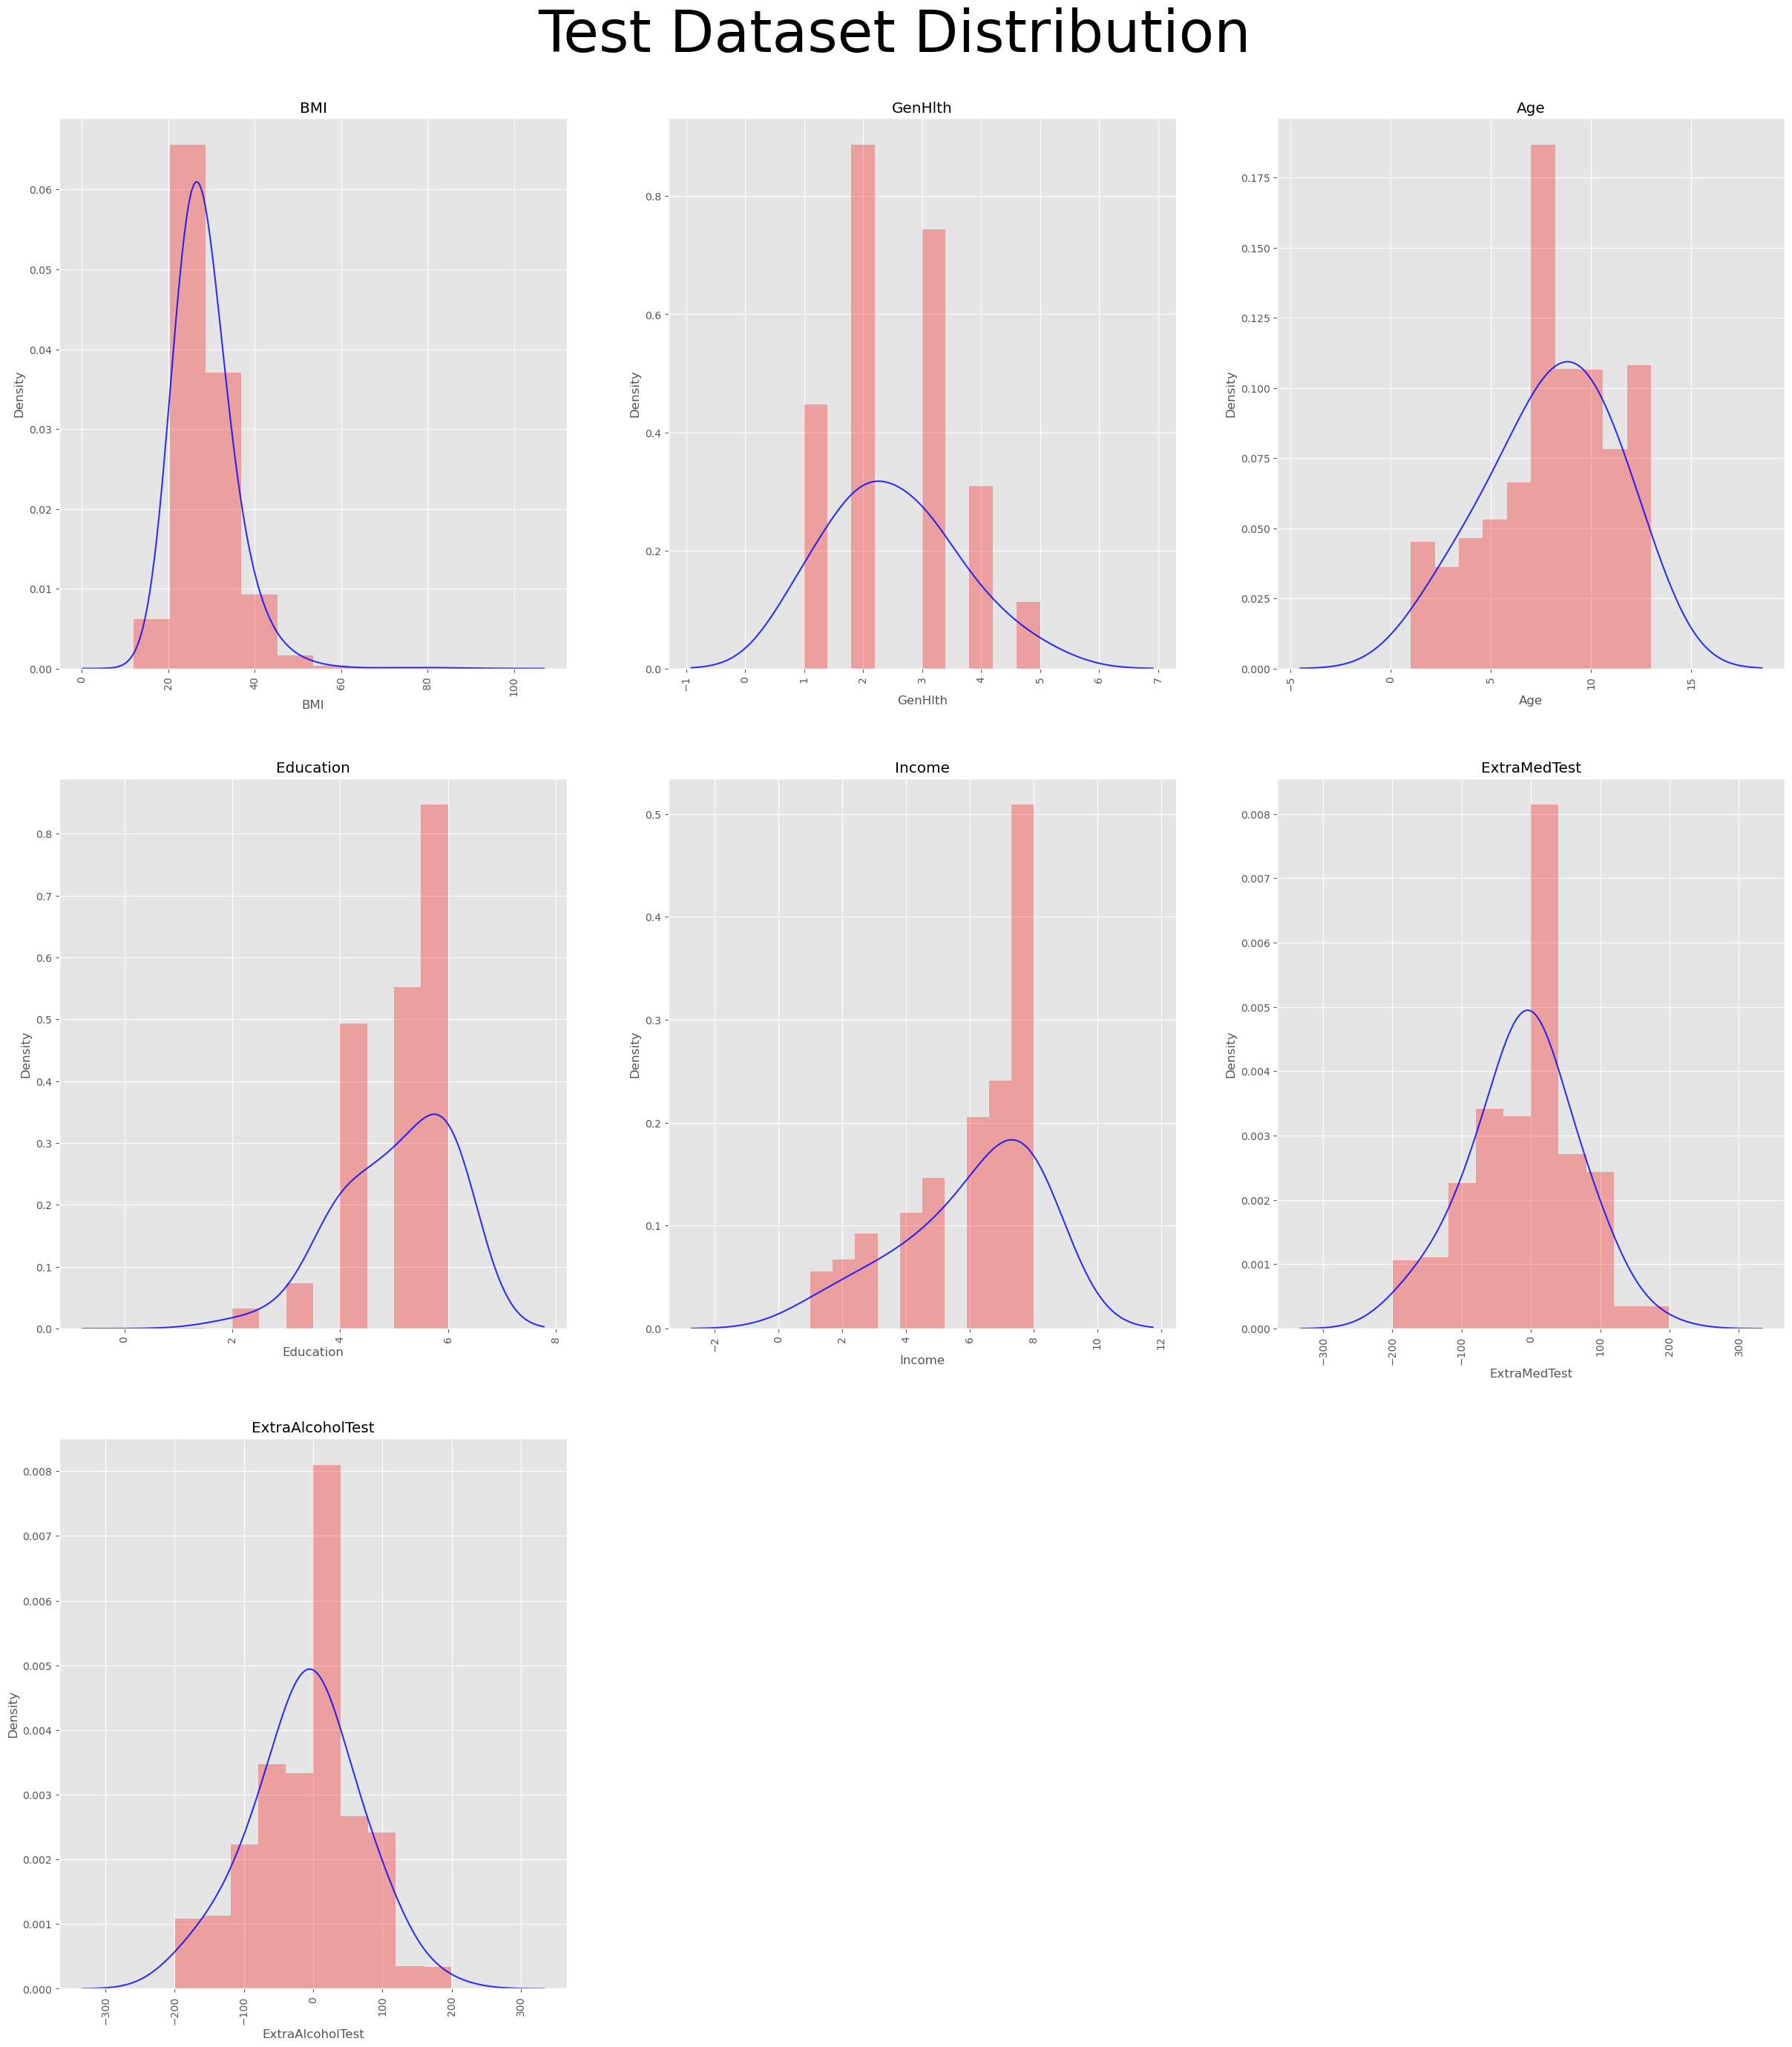

In [32]:
plt.figure(figsize=(30,30))
plt.suptitle("Test Dataset Distribution", fontsize=56, y=1.0)
count = 0
for i, col in enumerate(numerical_df_test.columns):
    plt.subplot(3,3,count+1)
    plt.subplots_adjust(top=0.95)
    plt.hist(numerical_df_test[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
    count += 1
    sns.kdeplot(numerical_df_test[col], color="blue", alpha=0.8, bw_method=0.6)

There are very similar distribution of the data for both the train and test datasets. We can also see, most of the columns are distributed close to normal distribution shape, except:
- `BMI`, `GenHlth`: Skew slightly to left
- `Education`, `Income`: Skew slightly to right 

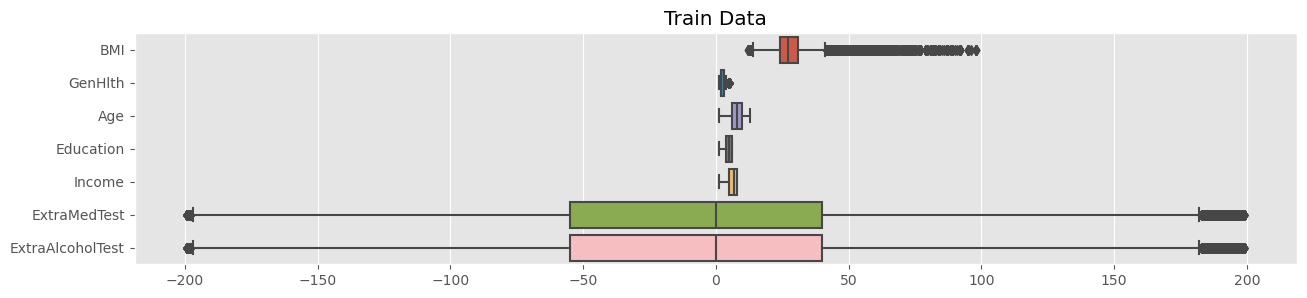

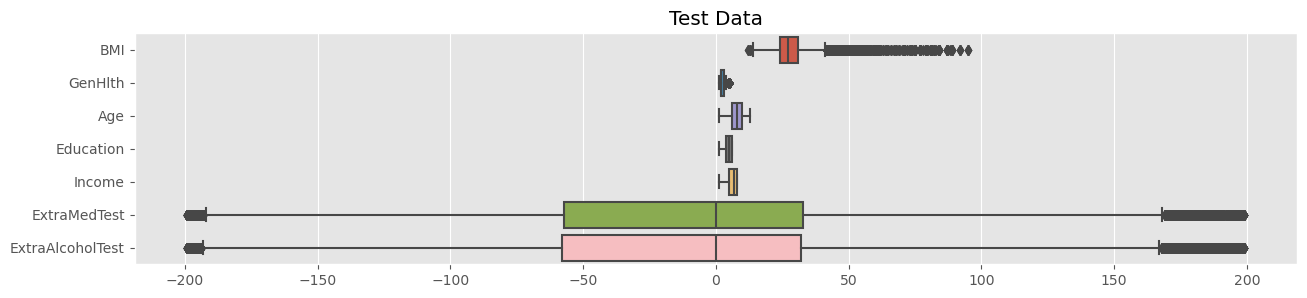

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))

sns.boxplot(data=numerical_df, orient="h", ax=axes)

axes.set_title("Train Data")

plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))

sns.boxplot(data=numerical_df_test, orient="h", ax=axes)

axes.set_title("Test Data")

plt.show()

There are 2 issues:
- The range of different features is very different
- There are many outliers, especially for `BMI`

Let's plot a histogram and a box plot for each features, so that we can further analyze.

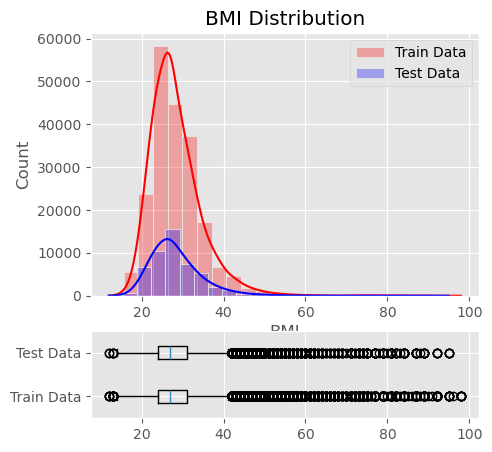

Number of outliers in BMI train dataset: 7859
Number of outliers in BMI test dataset: 1988

       BMI_Train Dataset  BMI_Test Dataset
count      202944.000000      50736.000000
mean           28.379824         28.392522
std             6.612738          6.592550
min            12.000000         12.000000
25%            24.000000         24.000000
50%            27.000000         27.000000
75%            31.000000         31.000000
max            98.000000         95.000000


In [34]:
def plotHistAndBox(col, bw):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 5), gridspec_kw={"height_ratios": [3, 1]})

    # Histogram Train
    axes[0].set_title(f"{col} Distribution")

    axes[0].set_ylabel("Count")

    sns.histplot(numerical_df[col], bins=min(numerical_df.shape[0] // 10, 24), color="r", alpha=0.3, kde=True, kde_kws={'bw_adjust': bw}, ax=axes[0], label="Train Data")
    
    # Histogram Test
    axes[0].set_title(f"{col} Distribution")

    axes[0].set_ylabel("Count")

    sns.histplot(numerical_df_test[col], bins=min(numerical_df_test.shape[0] // 10, 24), color="b", alpha=0.3, kde=True, kde_kws={'bw_adjust': bw}, ax=axes[0], label="Test Data")
    
    axes[0].legend()
    
    # Box plot
    axes[1].boxplot([numerical_df[col], numerical_df_test[col]], vert=False, labels=["Train Data", "Test Data"], widths=0.3)
    
    plt.show()

    # Calculate outliers
    Q1 = numerical_df[col].quantile(0.25)
    Q3 = numerical_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers_train = numerical_df[(numerical_df[col] < lower_bound) | (numerical_df[col] > upper_bound)]
    outliers_test = numerical_df_test[(numerical_df_test[col] < lower_bound) | (numerical_df_test[col] > upper_bound)]

    # Count the number of outliers
    num_outliers_train = outliers_train.shape[0]
    num_outliers_test = outliers_test.shape[0]
    print(f"Number of outliers in {col} train dataset: {num_outliers_train}")
    print(f"Number of outliers in {col} test dataset: {num_outliers_test}")
    
    stat_df = pd.concat([numerical_df[[col]].describe(), numerical_df_test[[col]].describe()],axis=1)
    print()
    stat_df.columns = [f"{col}_Train Dataset", f"{col}_Test Dataset"]
    print(stat_df)

plotHistAndBox('BMI', 2.5)


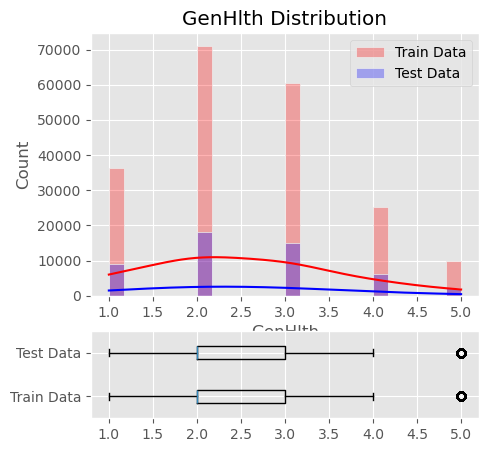

Number of outliers in GenHlth train dataset: 9790
Number of outliers in GenHlth test dataset: 2291

       GenHlth_Train Dataset  GenHlth_Test Dataset
count          202944.000000          50736.000000
mean                2.514024              2.500867
std                 1.070370              1.060819
min                 1.000000              1.000000
25%                 2.000000              2.000000
50%                 2.000000              2.000000
75%                 3.000000              3.000000
max                 5.000000              5.000000


In [35]:
plotHistAndBox('GenHlth', 6)

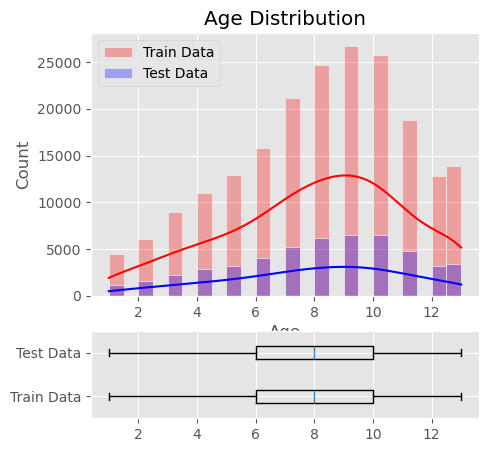

Number of outliers in Age train dataset: 0
Number of outliers in Age test dataset: 0

       Age_Train Dataset  Age_Test Dataset
count      202944.000000      50736.000000
mean            8.037449          8.010801
std             3.051568          3.064743
min             1.000000          1.000000
25%             6.000000          6.000000
50%             8.000000          8.000000
75%            10.000000         10.000000
max            13.000000         13.000000


In [36]:
plotHistAndBox('Age',3)

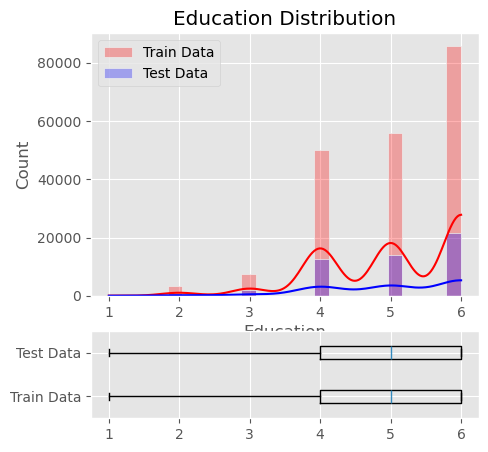

Number of outliers in Education train dataset: 0
Number of outliers in Education test dataset: 0

       Education_Train Dataset  Education_Test Dataset
count            202944.000000            50736.000000
mean                  5.050245                5.051187
std                   0.985601                0.986477
min                   1.000000                1.000000
25%                   4.000000                4.000000
50%                   5.000000                5.000000
75%                   6.000000                6.000000
max                   6.000000                6.000000


In [37]:
plotHistAndBox('Education',3)

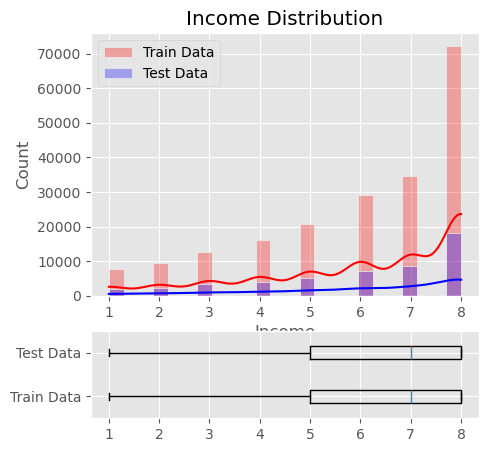

Number of outliers in Income train dataset: 0
Number of outliers in Income test dataset: 0

       Income_Train Dataset  Income_Test Dataset
count         202944.000000         50736.000000
mean               6.055641             6.046811
std                2.070140             2.075180
min                1.000000             1.000000
25%                5.000000             5.000000
50%                7.000000             7.000000
75%                8.000000             8.000000
max                8.000000             8.000000


In [38]:
plotHistAndBox('Income',2)

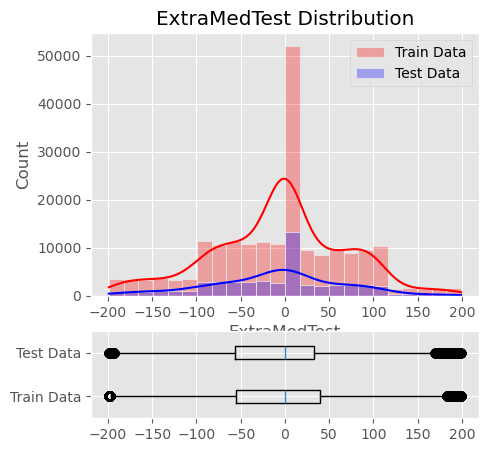

Number of outliers in ExtraMedTest train dataset: 2002
Number of outliers in ExtraMedTest test dataset: 384

       ExtraMedTest_Train Dataset  ExtraMedTest_Test Dataset
count               202944.000000               50736.000000
mean                    -7.408660                 -10.972189
std                     75.993743                  74.323238
min                   -199.000000                -199.000000
25%                    -55.000000                 -57.000000
50%                      0.000000                   0.000000
75%                     40.000000                  33.000000
max                    199.000000                 199.000000


In [39]:
plotHistAndBox('ExtraMedTest',3)

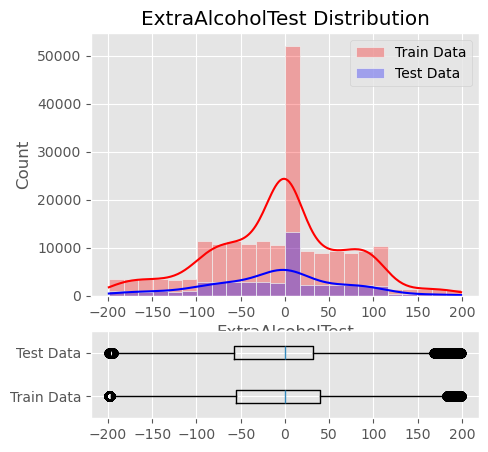

Number of outliers in ExtraAlcoholTest train dataset: 1899
Number of outliers in ExtraAlcoholTest test dataset: 399

       ExtraAlcoholTest_Train Dataset  ExtraAlcoholTest_Test Dataset
count                   202944.000000                   50736.000000
mean                        -7.560041                     -11.429202
std                         75.927137                      74.525657
min                       -199.000000                    -199.000000
25%                        -55.000000                     -58.000000
50%                          0.000000                       0.000000
75%                         40.000000                      32.000000
max                        199.000000                     199.000000


In [40]:
plotHistAndBox('ExtraAlcoholTest', 3)

**Common Characteristics**
- The numerical features have different range, so we will need to apply a scaler before training the model
- There are outliers for some collumns, which will need to be removed
- Train and Test dataset have very similar distribution as seen with the categorical values

**Analysis**
| Column  | Distribution  | Outliers  | Additional Findings  | Conclusion  |
| ------------ | ------------ | ------------ | ------------ | ------------ |
| BMI  | Normal Distribution skew slightly toward lower BMI  | Few outliers at the higher BMI value  | Mean and Median value is close  | Might need to process outliers, and need to apply transformation for normal distribution  |
| GenHlth  | Normal Distribution skew slightly toward the peak of value 2  |  Few outliers toward the end (value 5) | N/A  | Might need to process outliers, and need to apply transformation for normal distribution  |
| Age  | Normal Distribution with some peaks, and skew toward the higher age group  | No outliers at all, since age put into groups  | N/A  | No further processing   |
| Education  | Heavily left skew distribution toward higher education group  | No outliers at all, since education put into groups  | N/A  | Need to apply transformation   |
| Income  | Exponential distribution lies toward higher income group  | No outliers at all, since income put into groups  | N/A  | No further processing  |
| ExtraMedTes  | Normal Distribution with very tall peak at 0 | Some outliers at both end  | N/A  | No further processing  |
| ExtraAlcoholTest  | Normal Distribution with very tall peak at 0  | Some outliers at both end  | N/A  |  No further processing |


## 5. Feature Correlation 📗<a id='loading'></a> 

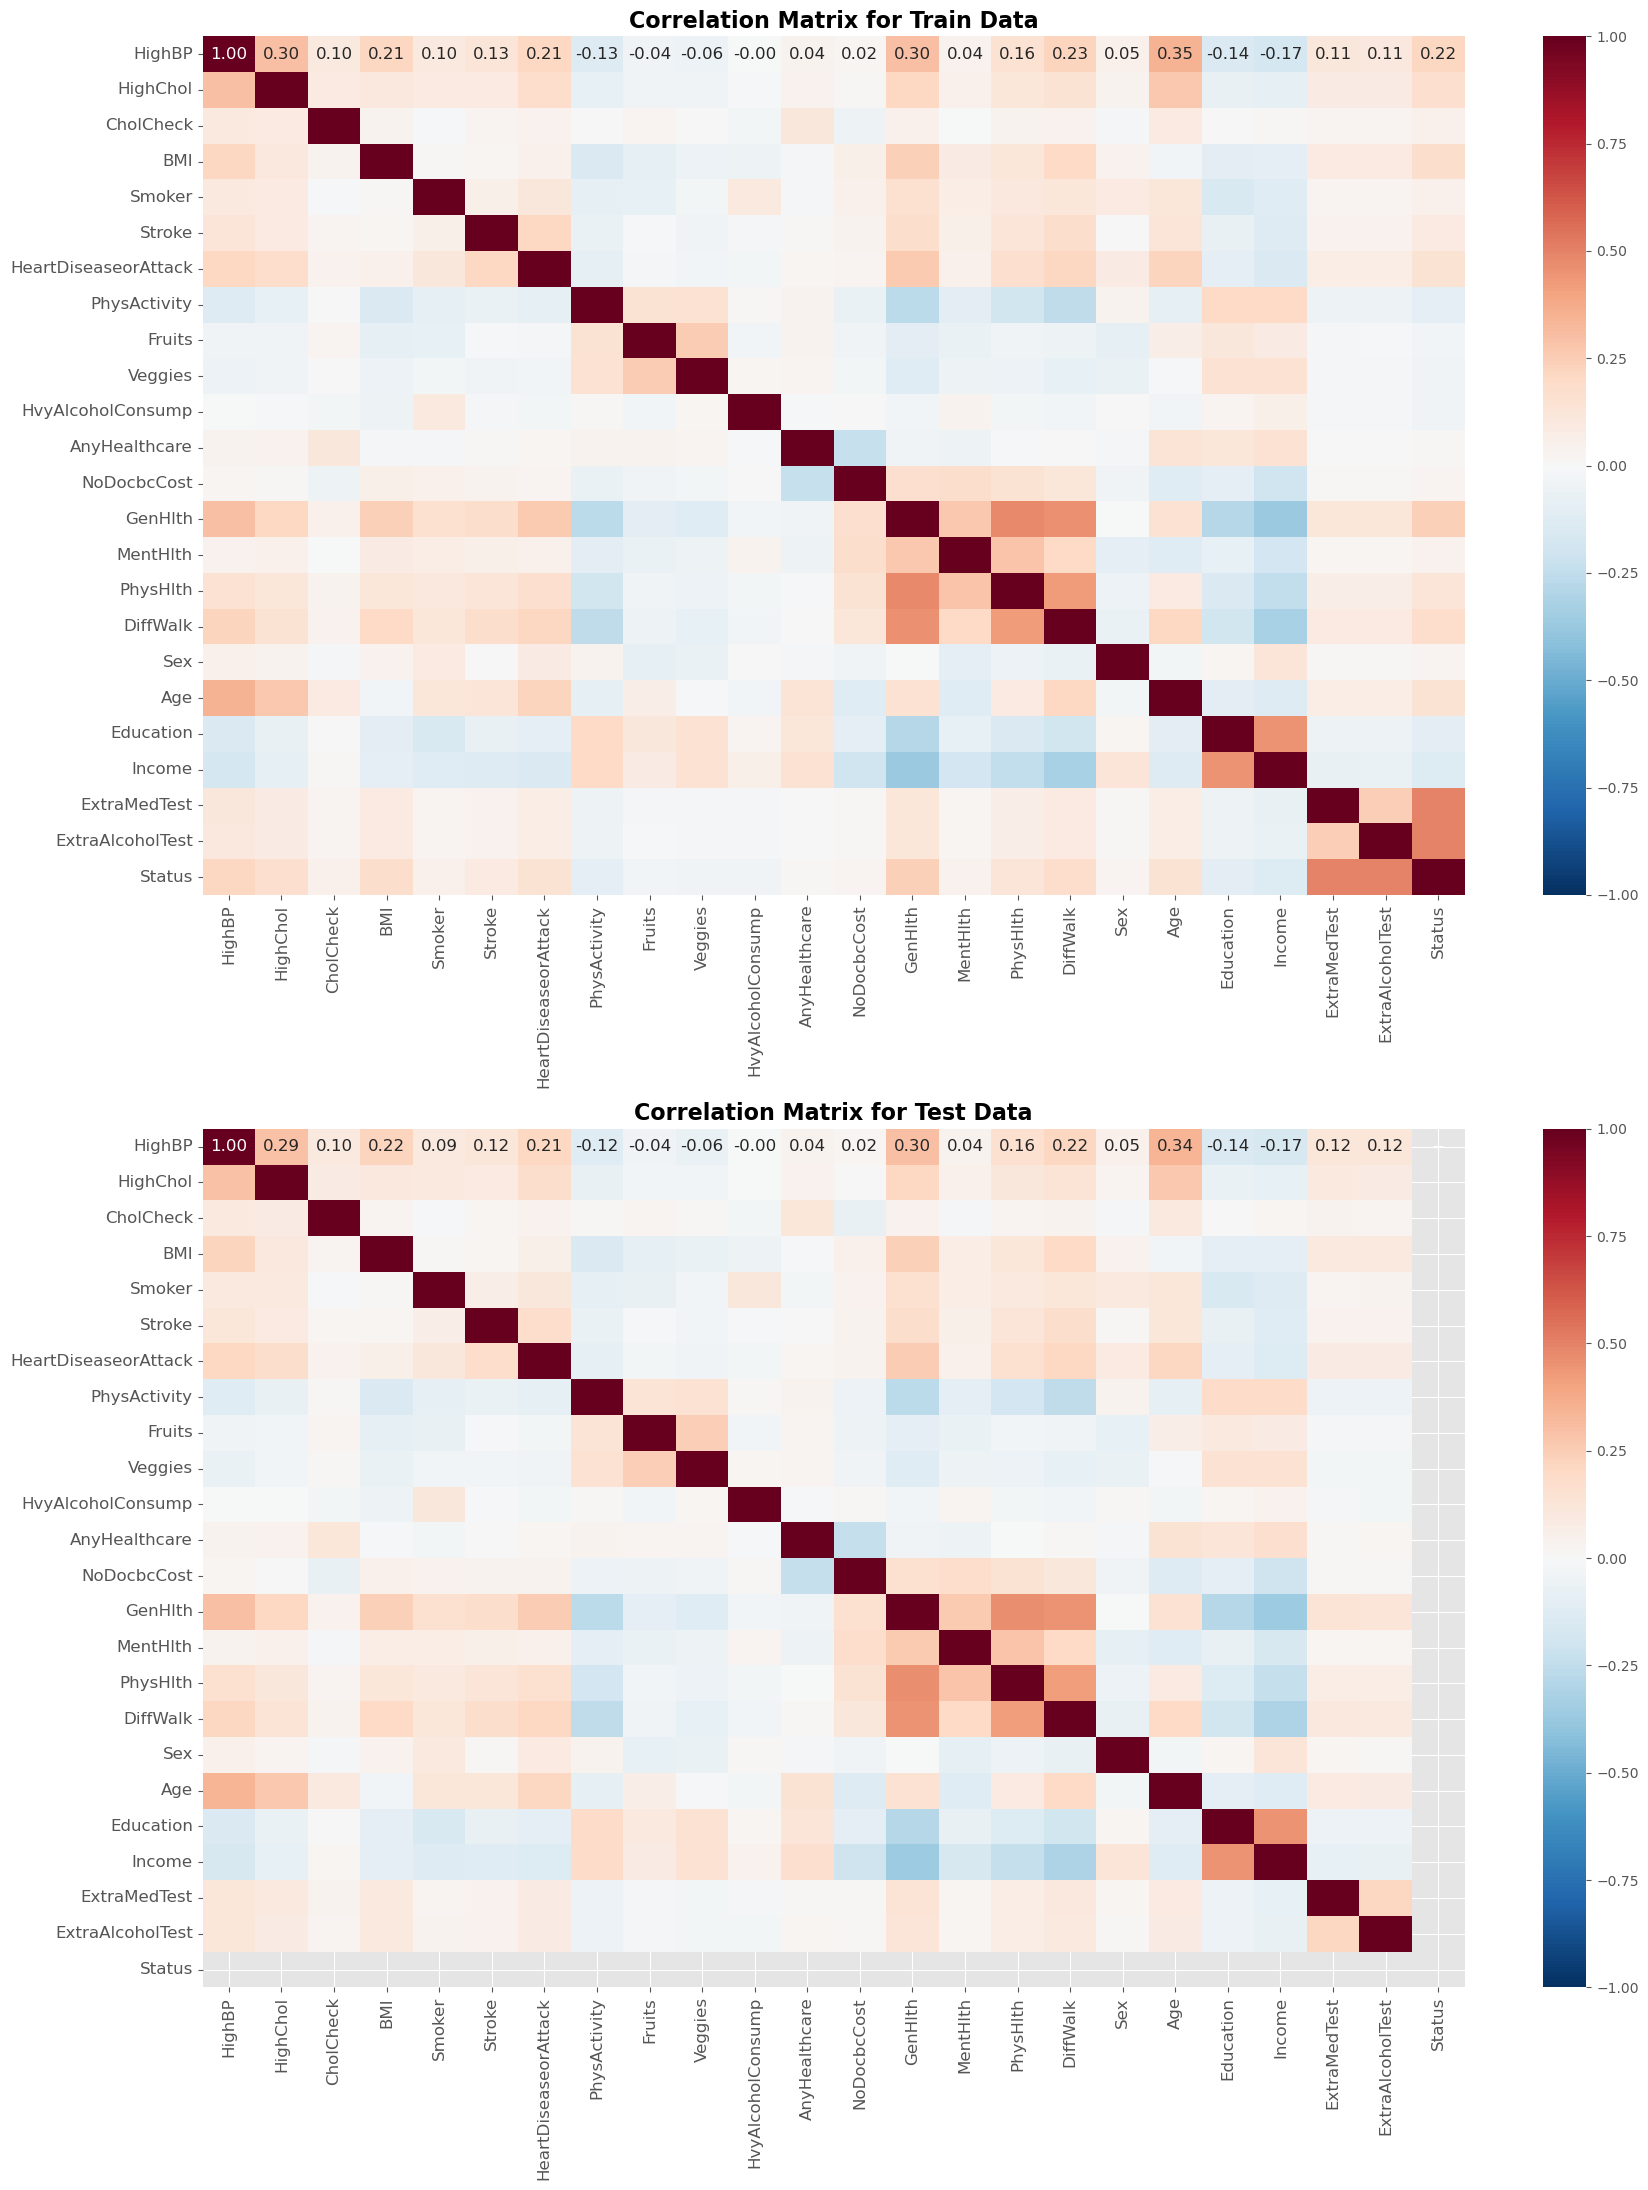

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 22))

# Correlation matrix for train data
axes[0].set_title("Correlation Matrix for Train Data", fontsize=16, fontweight="bold")
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, cmap='RdBu_r', annot=True, fmt=".2f", ax=axes[0], annot_kws={"fontsize":12}, xticklabels=True, yticklabels=True)
axes[0].tick_params(axis='both', which='major', labelsize=12)

# Correlation matrix for test data
axes[1].set_title("Correlation Matrix for Test Data", fontsize=16, fontweight="bold")
sns.heatmap(df_test.corr(), vmin=-1, vmax=1, cmap='RdBu_r', annot=True, fmt=".2f", ax=axes[1], annot_kws={"fontsize":12}, xticklabels=True, yticklabels=True)
axes[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

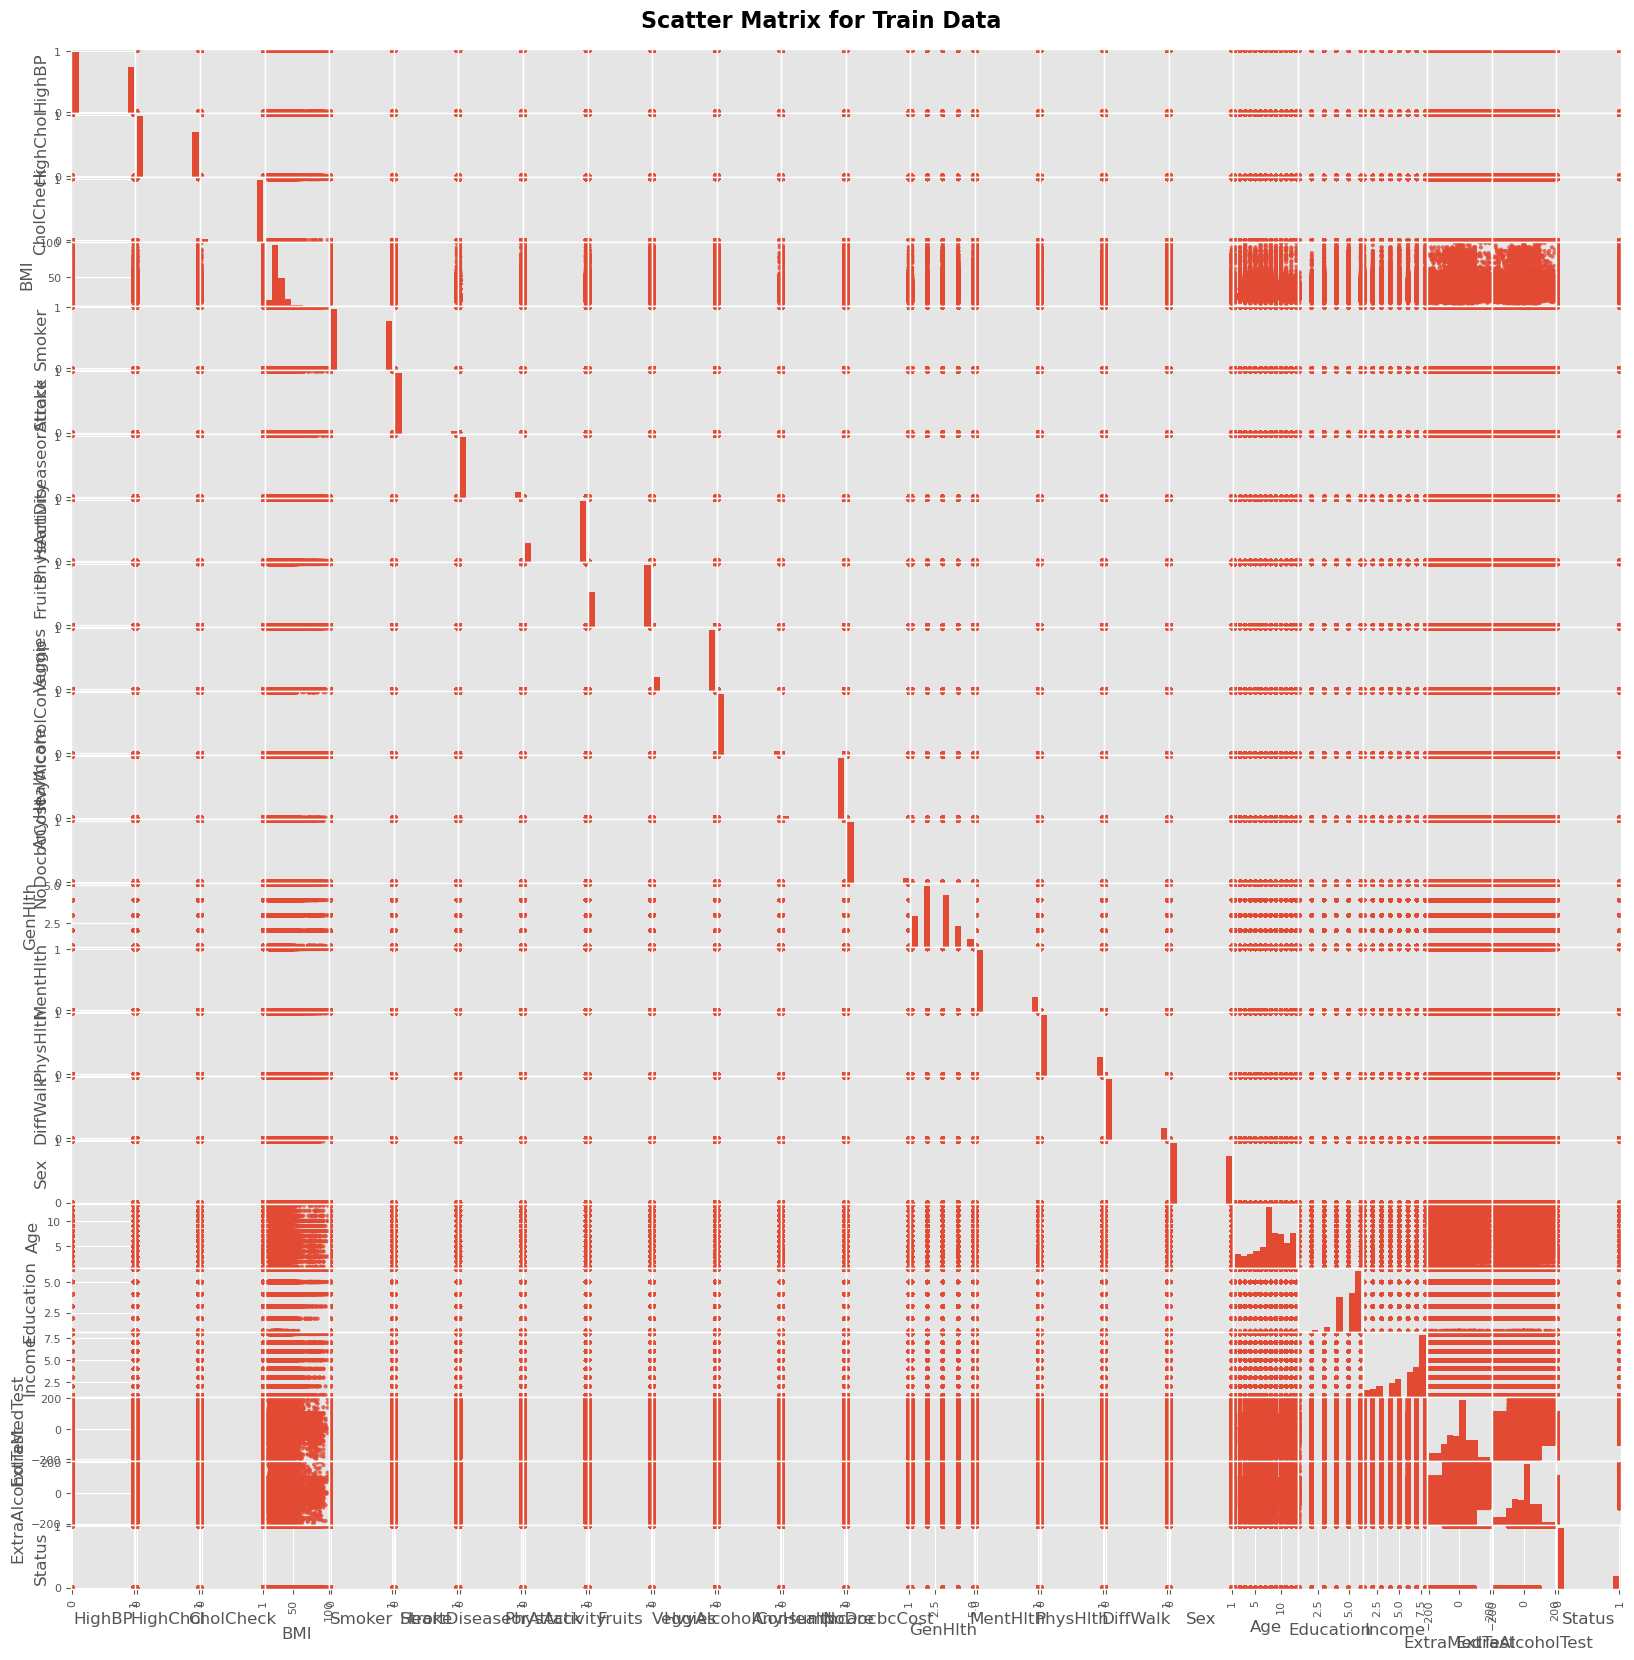

In [42]:
pd.plotting.scatter_matrix(df_train, figsize=(20, 20), alpha=0.8)
plt.suptitle("Scatter Matrix for Train Data", fontsize=16, fontweight="bold", y=0.9)
plt.show()

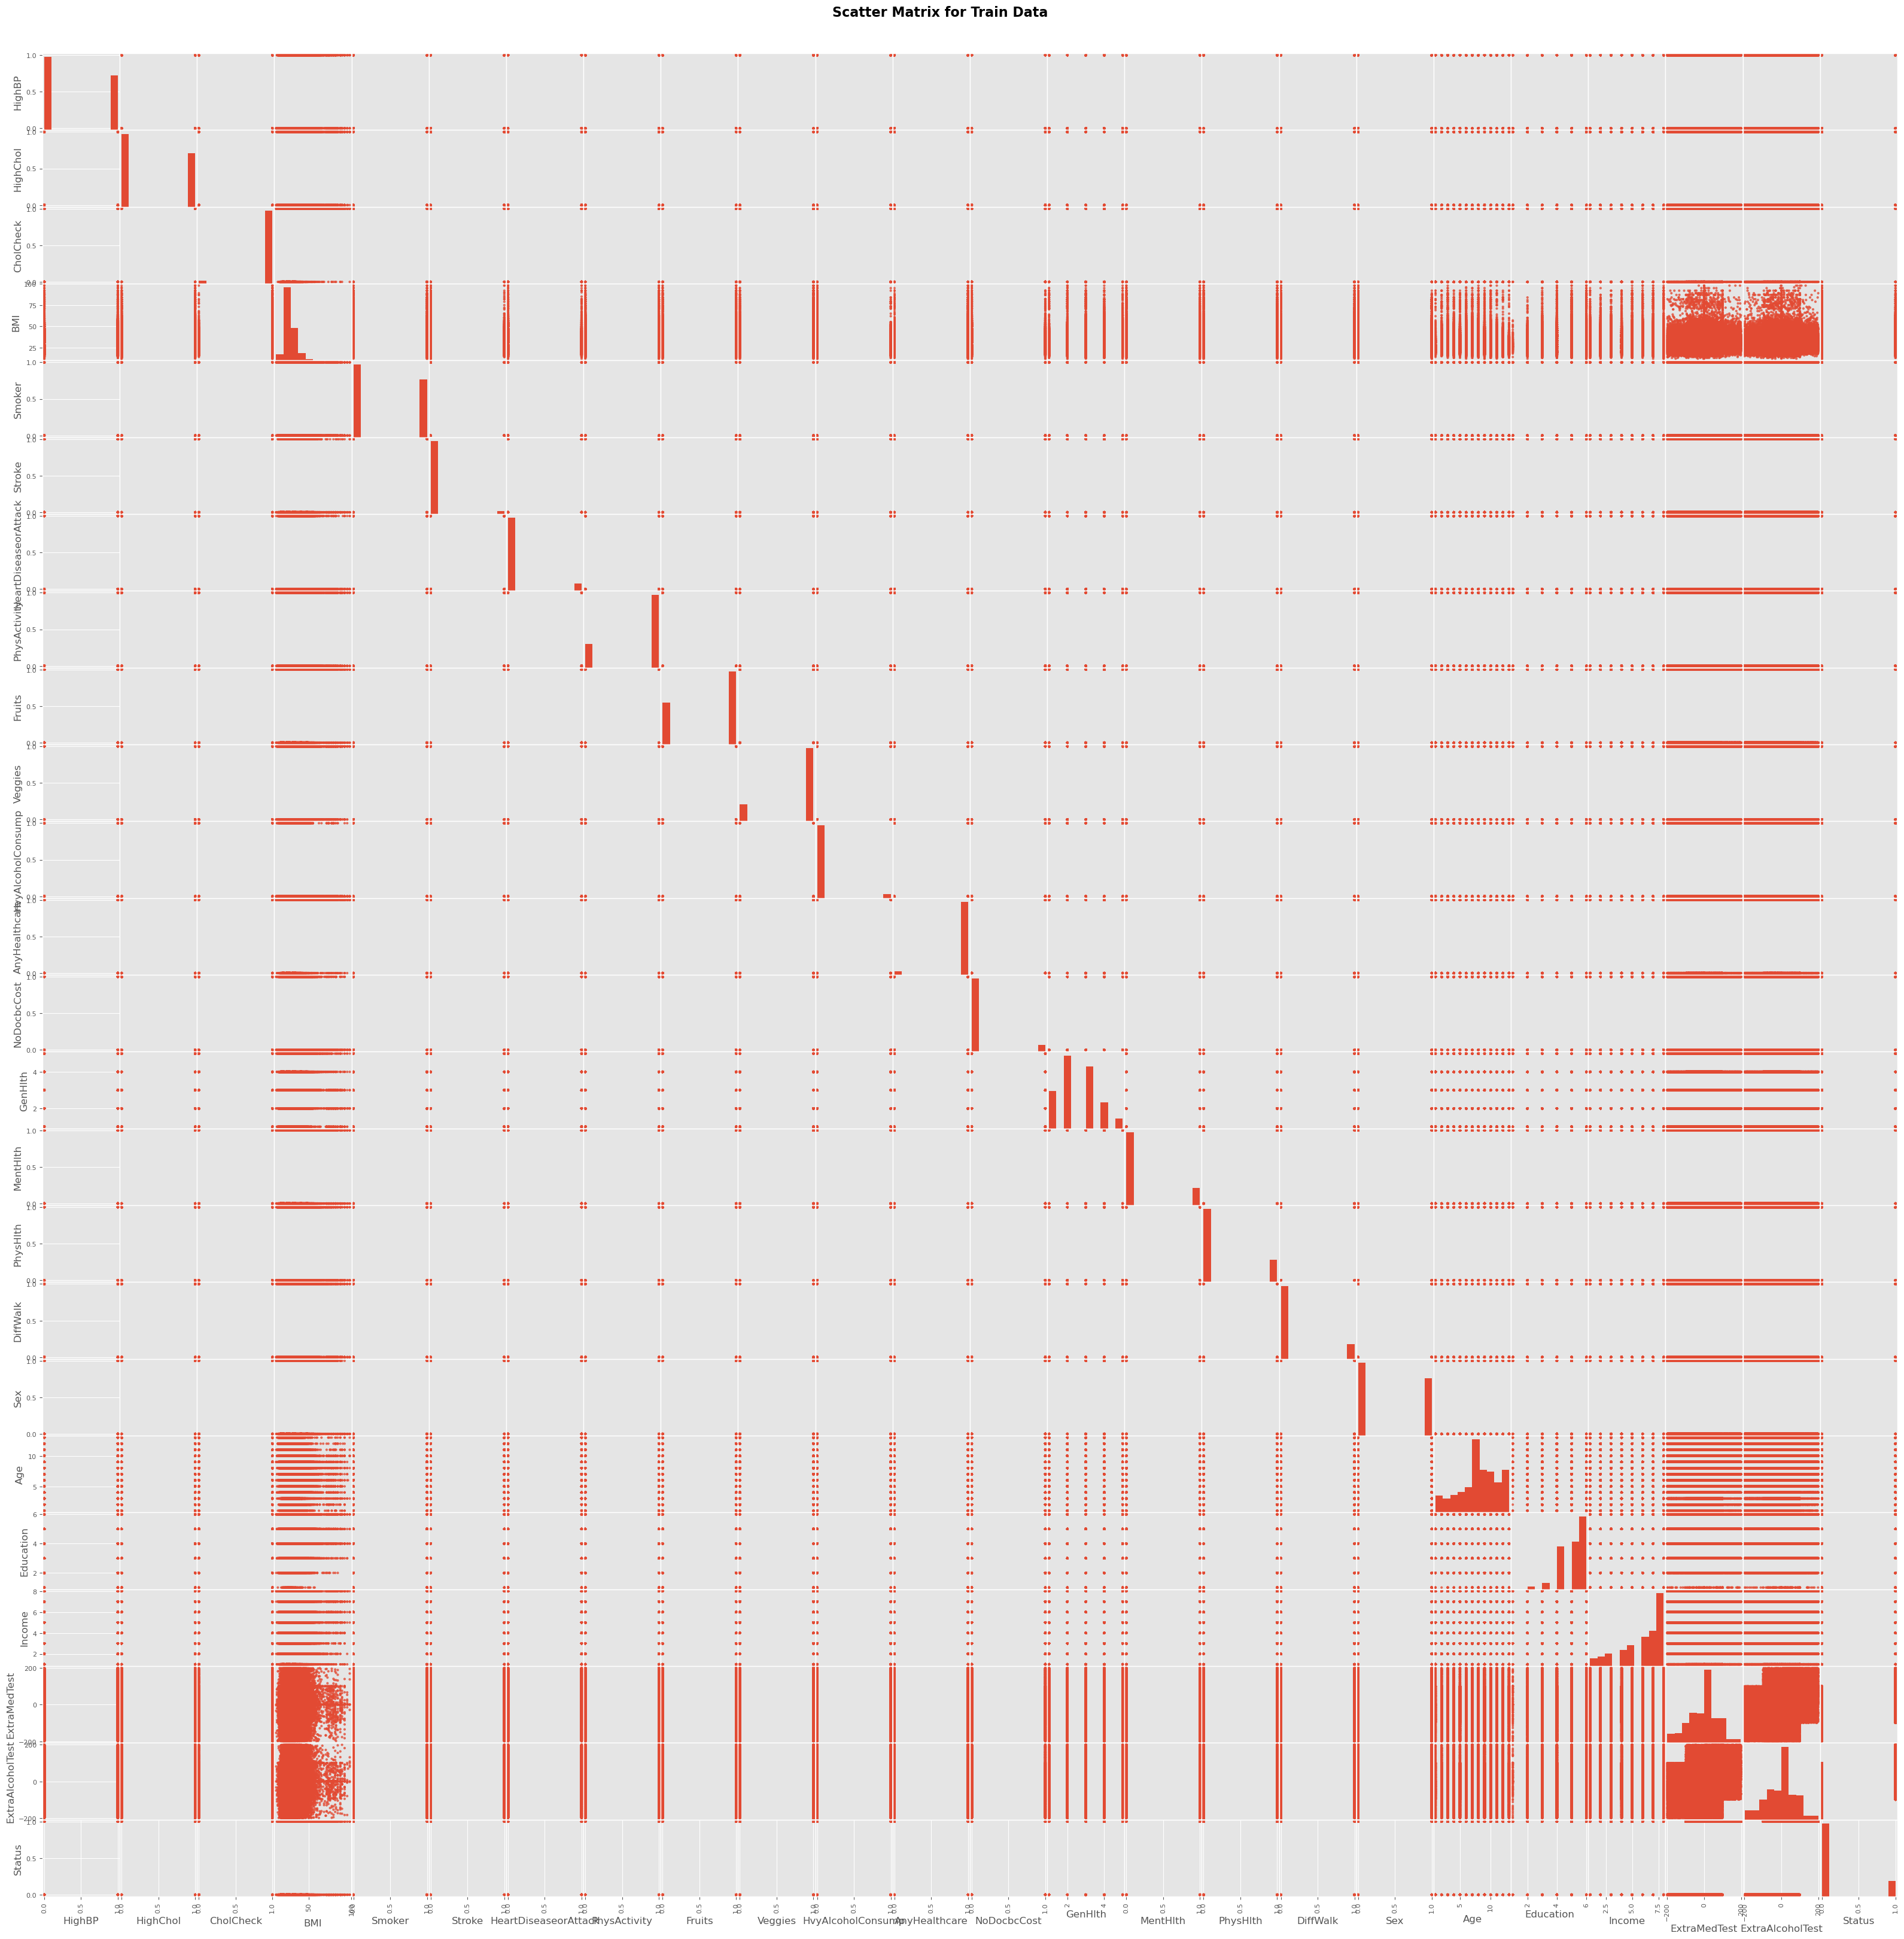

In [43]:
pd.plotting.scatter_matrix(df_train, figsize=(40, 40), alpha=0.8)
plt.suptitle("Scatter Matrix for Train Data", fontsize=16, fontweight="bold", y=0.9)
plt.show()

There are many non-linear correlation between features, which may affect the performance of model that use regression algorithm.

**Analysis:**
- Education-Status (-0.1) and Sex-Status (0.02) have low correlation, but there haven't been scientific sources show the direct correlation between education and diabetes, so we will **remove education**
- Smoker, Stroke, Fruits, Veggies, HvyAlcoholConsump have low correlation with Status, but their are scientific sources show the relation between them and diabetes, so we should keep them.
-  AnyHealthCare have very low variety, and low correlation, and we have removed it in the previous steps.
- ExtraMedTest and ExtraAlcoholTest have strong correlation with Status.


### 5.1 Correlation Between Features

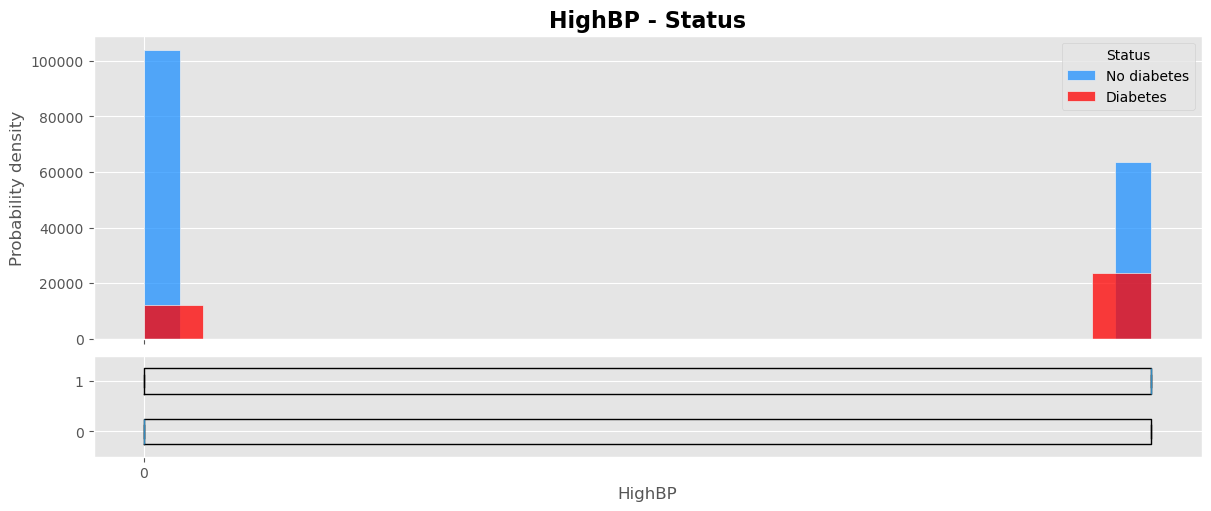

In [44]:
def show_distribution_corr(feature_col: str, target_col: str,title: str,type: str,ticker_multiple_locator: int = 5):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), constrained_layout=True, sharex="col",gridspec_kw={"height_ratios": [3, 1]})

    if type == "cat":
        sns.histplot(df_train[df_train[target_col] == 0][feature_col], color="dodgerblue", label="No diabetes", ax=axes[0])
        sns.histplot(df_train[df_train[target_col] == 1][feature_col], color="red", label="Diabetes", ax=axes[0])
    if type == "num":
        sns.histplot(df_train[df_train[target_col] == 0][feature_col], kde=True, color="dodgerblue", label="Non-diabetes", ax=axes[0])
        sns.histplot(df_train[df_train[target_col] == 1][feature_col], kde=True, color="red", label="Diabetes", ax=axes[0])
    axes[0].legend(title="Status", loc="upper right")
    axes[0].set_ylabel("Probability density", fontsize=12)
    axes[0].xaxis.set_major_locator(
        ticker.MultipleLocator(
            ticker_multiple_locator
        )
    )
    if title is not None:
        axes[0].set_title(title, fontsize=16, fontweight="bold")

    axes[1].boxplot(
        [
            df_train.loc[df_train[target_col] == 0, feature_col],
            df_train.loc[df_train[target_col] == 1, feature_col]
        ],
        vert=False, labels=["0", "1"], widths=0.5
    )
    axes[1].set_xlabel(feature_col, fontsize=12)

    plt.show()
    
show_distribution_corr("HighBP", "Status", "HighBP - Status", "cat")

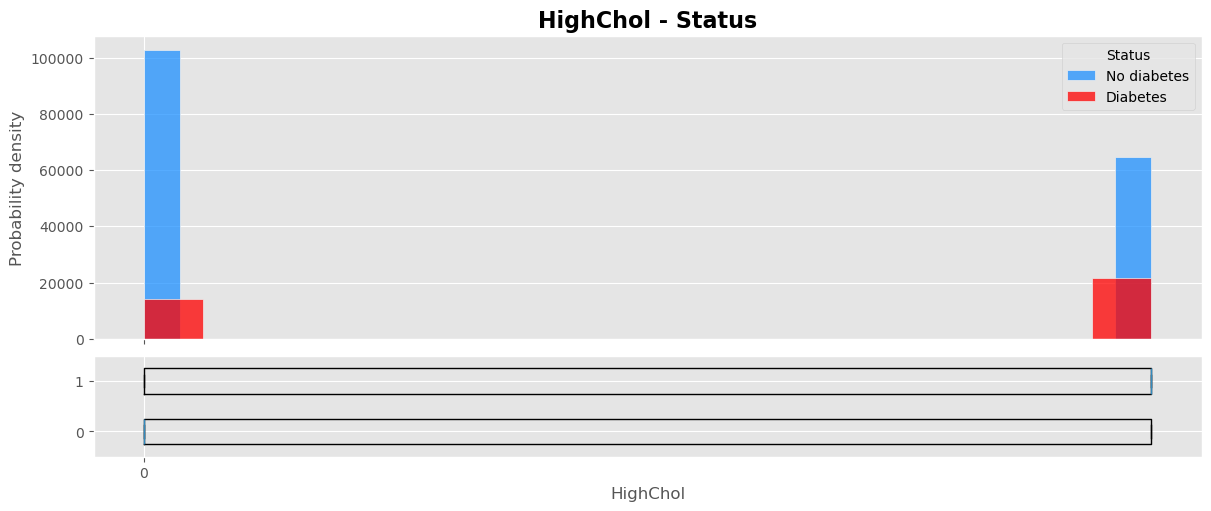

In [45]:
show_distribution_corr("HighChol", "Status", "HighChol - Status", "cat")

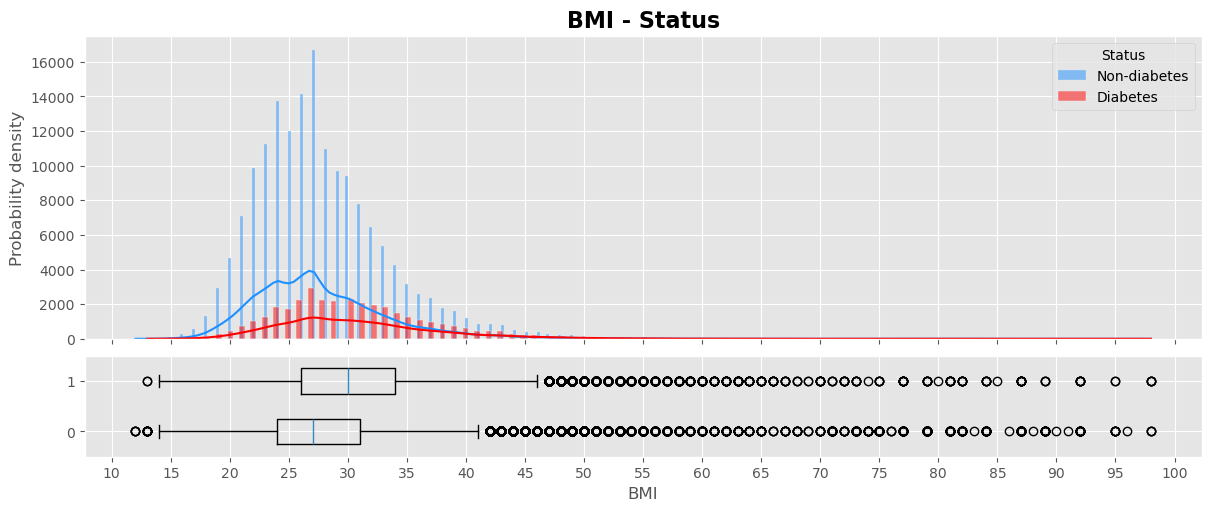

In [46]:
show_distribution_corr("BMI", "Status", "BMI - Status", "num")


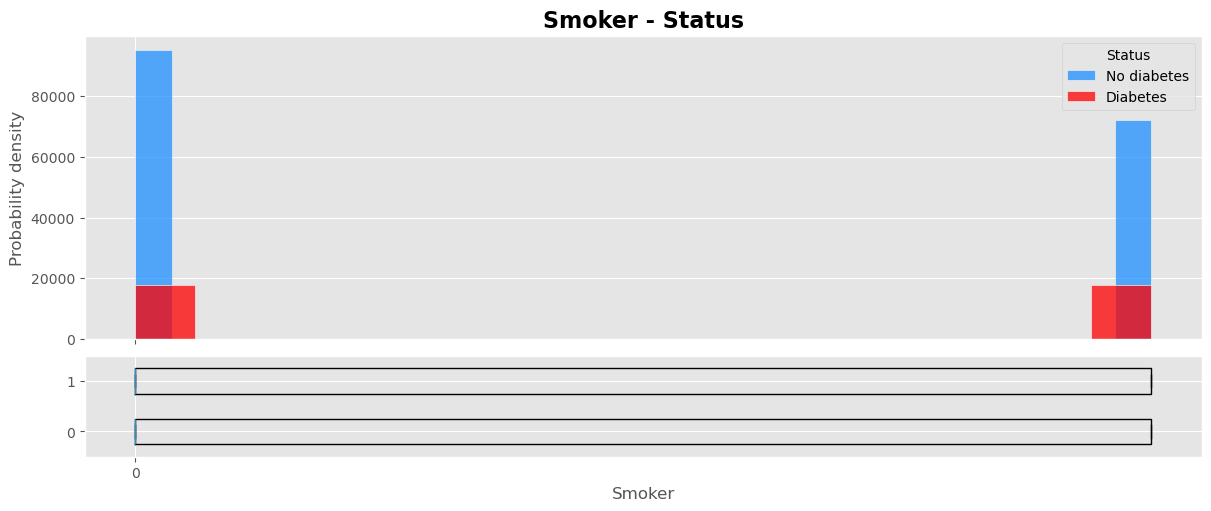

In [47]:
show_distribution_corr("Smoker", "Status", "Smoker - Status", "cat")


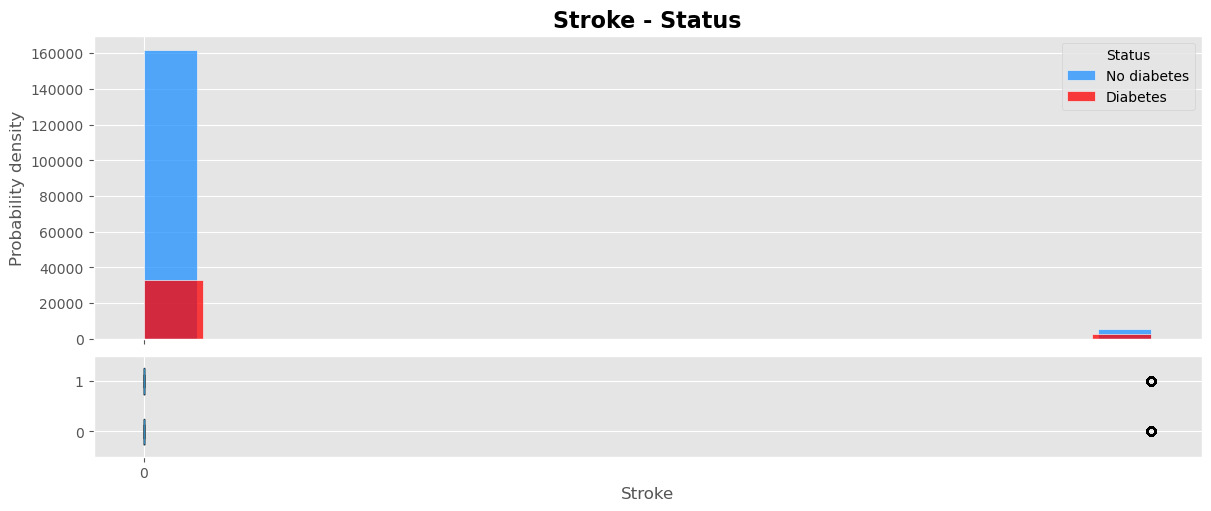

In [48]:
show_distribution_corr("Stroke", "Status", "Stroke - Status", "cat")


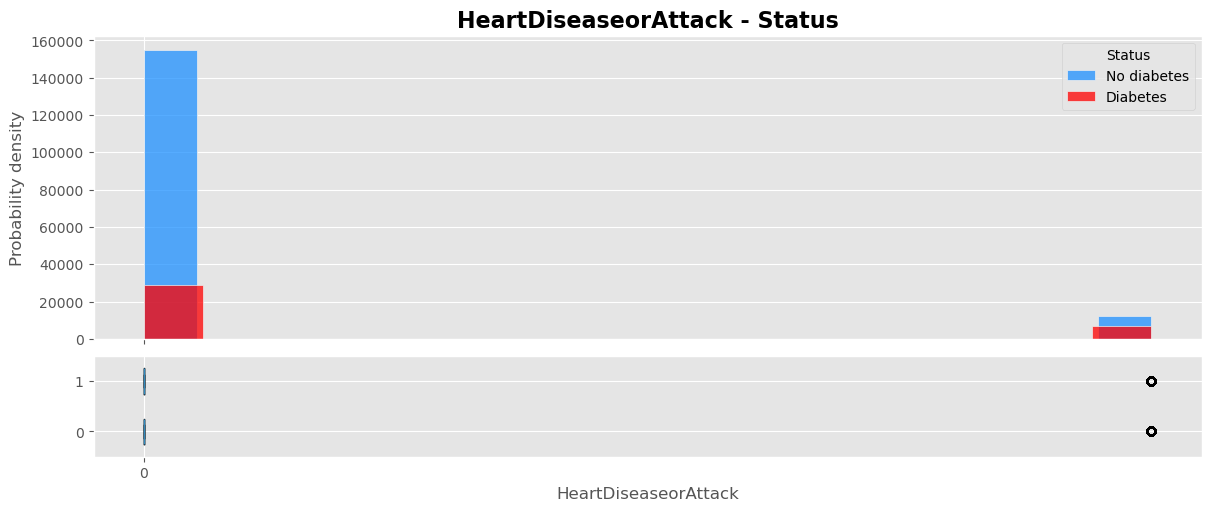

In [49]:
show_distribution_corr("HeartDiseaseorAttack", "Status", "HeartDiseaseorAttack - Status", "cat")


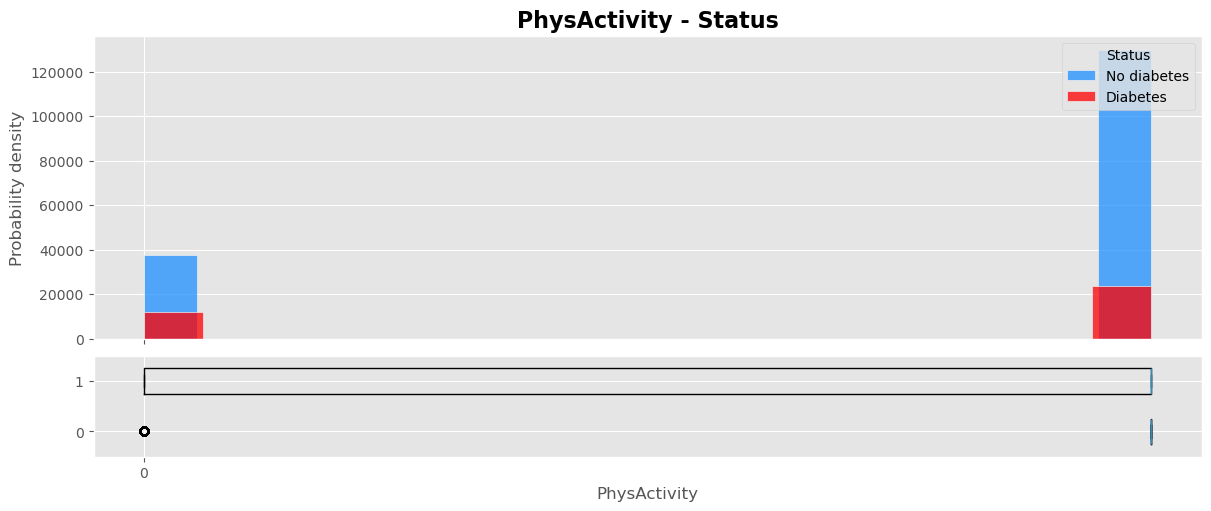

In [50]:
show_distribution_corr("PhysActivity", "Status", "PhysActivity - Status", "cat")


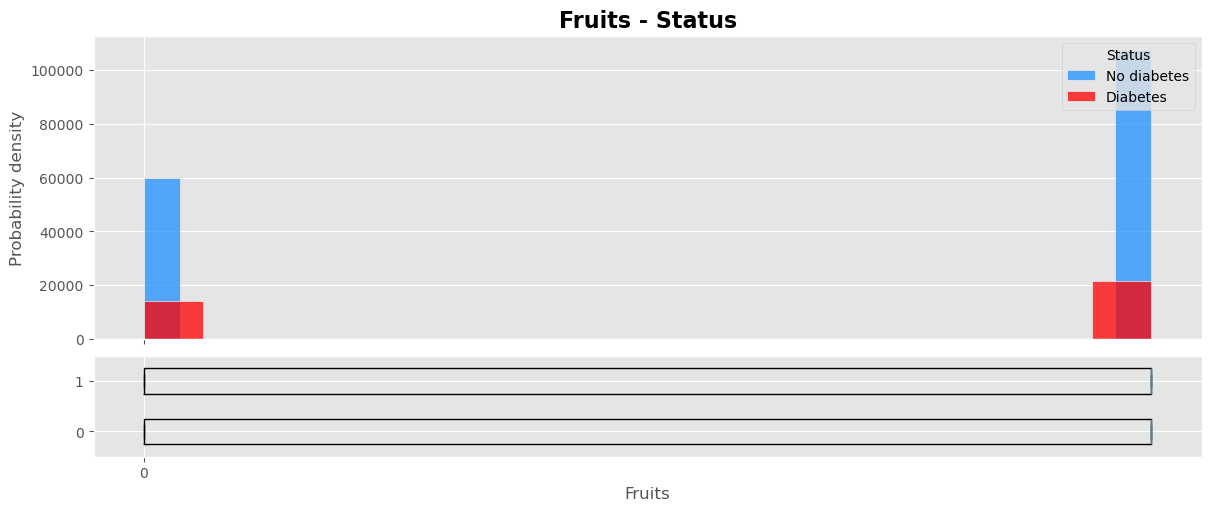

In [51]:
show_distribution_corr("Fruits", "Status", "Fruits - Status", "cat")


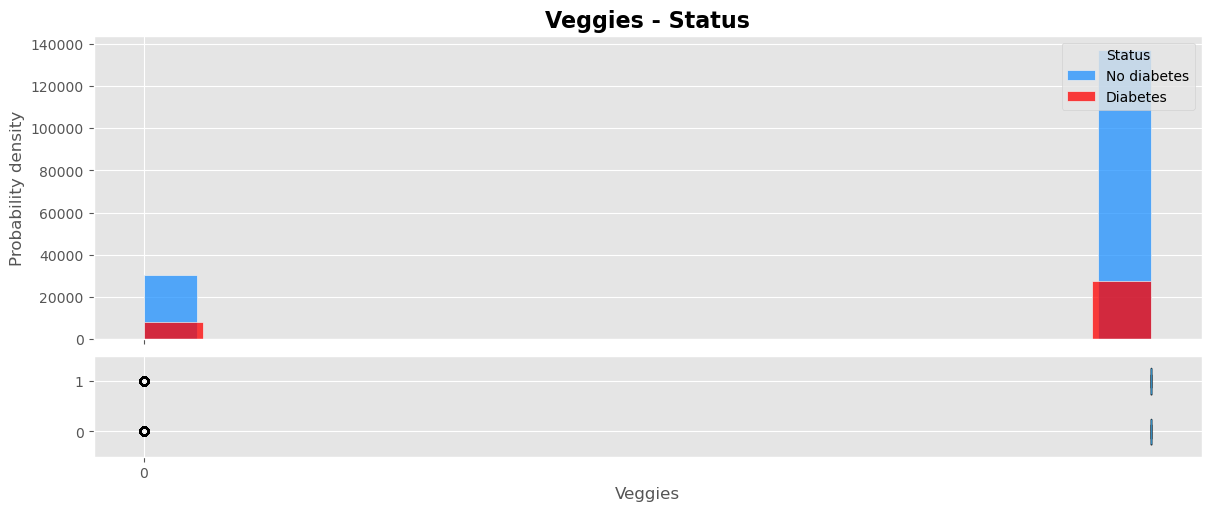

In [52]:
show_distribution_corr("Veggies", "Status", "Veggies - Status", "cat")


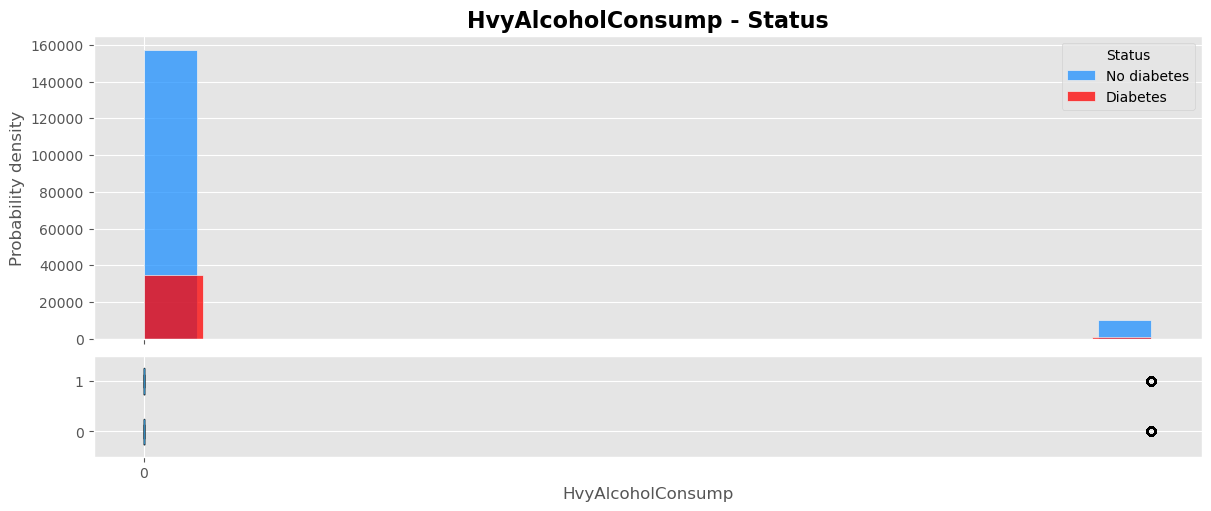

In [53]:
show_distribution_corr("HvyAlcoholConsump", "Status", "HvyAlcoholConsump - Status", "cat")


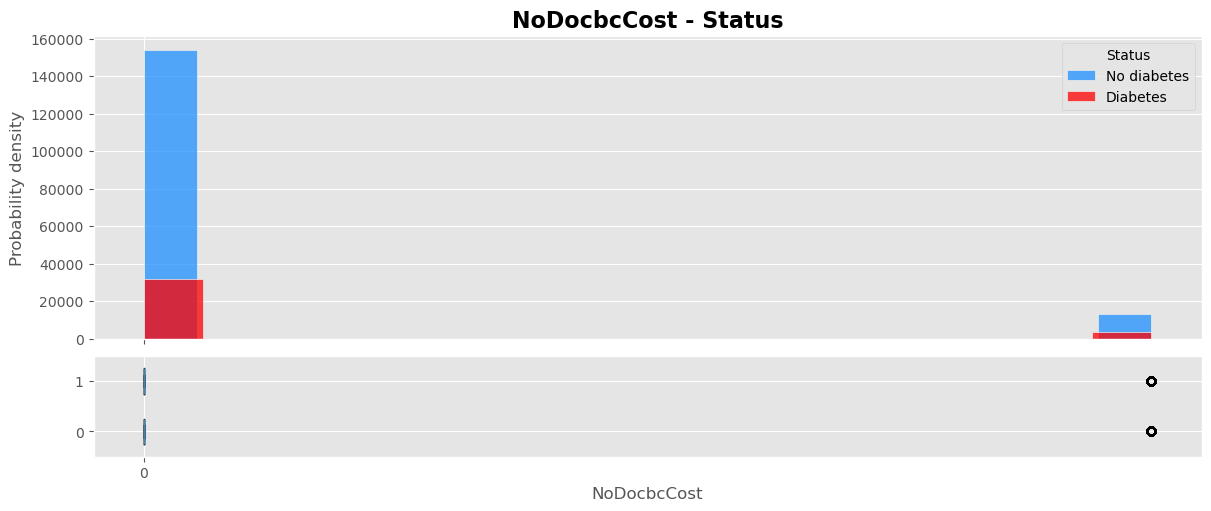

In [54]:
show_distribution_corr("NoDocbcCost", "Status", "NoDocbcCost - Status", "cat")


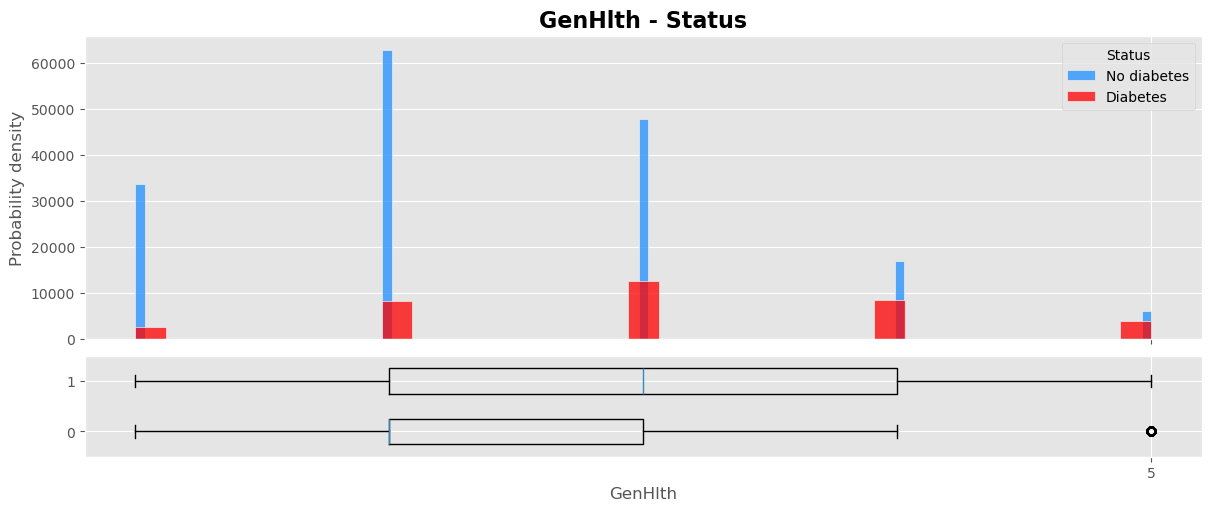

In [55]:
show_distribution_corr("GenHlth", "Status", "GenHlth - Status", "cat")


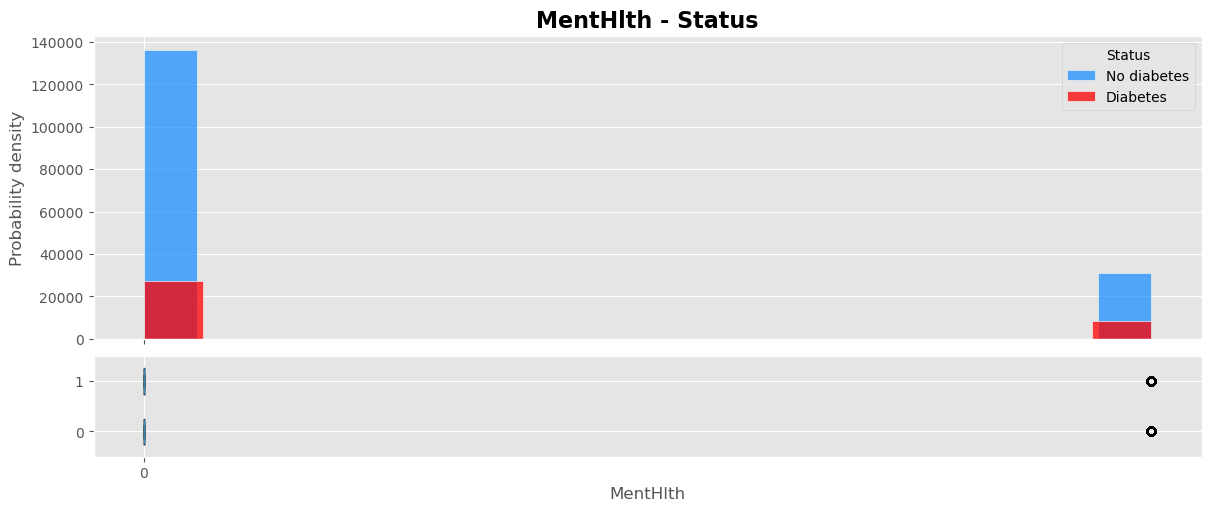

In [56]:
show_distribution_corr("MentHlth", "Status", "MentHlth - Status", "cat")


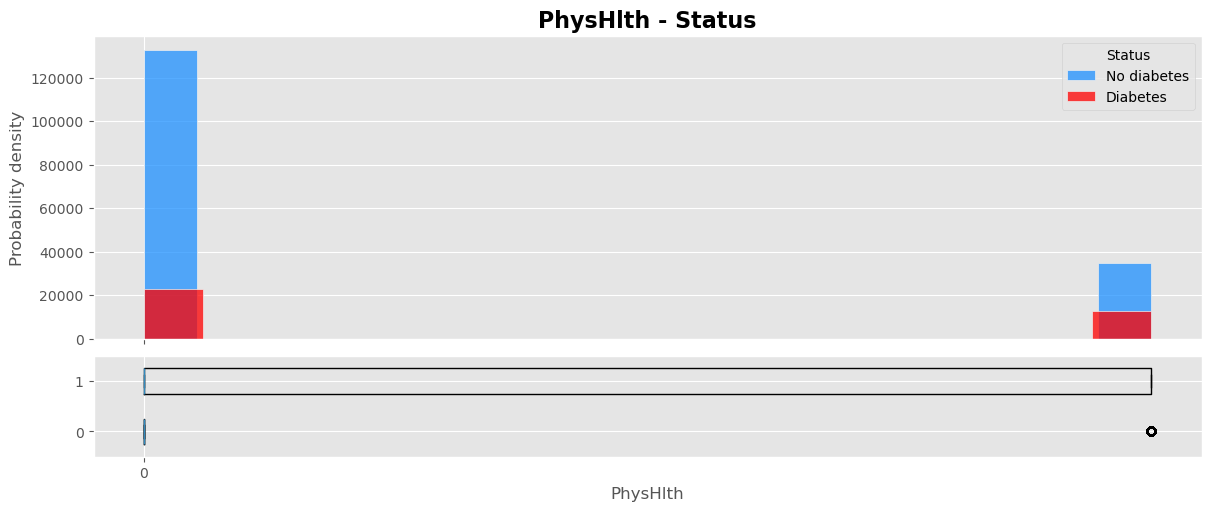

In [57]:
show_distribution_corr("PhysHlth", "Status", "PhysHlth - Status", "cat")


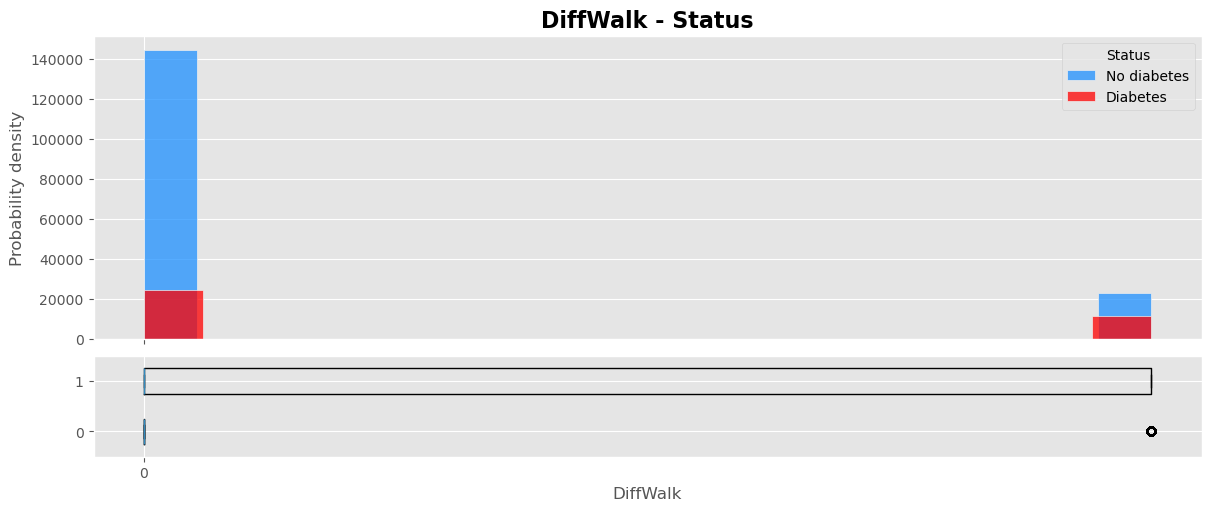

In [58]:
show_distribution_corr("DiffWalk", "Status", "DiffWalk - Status", "cat")


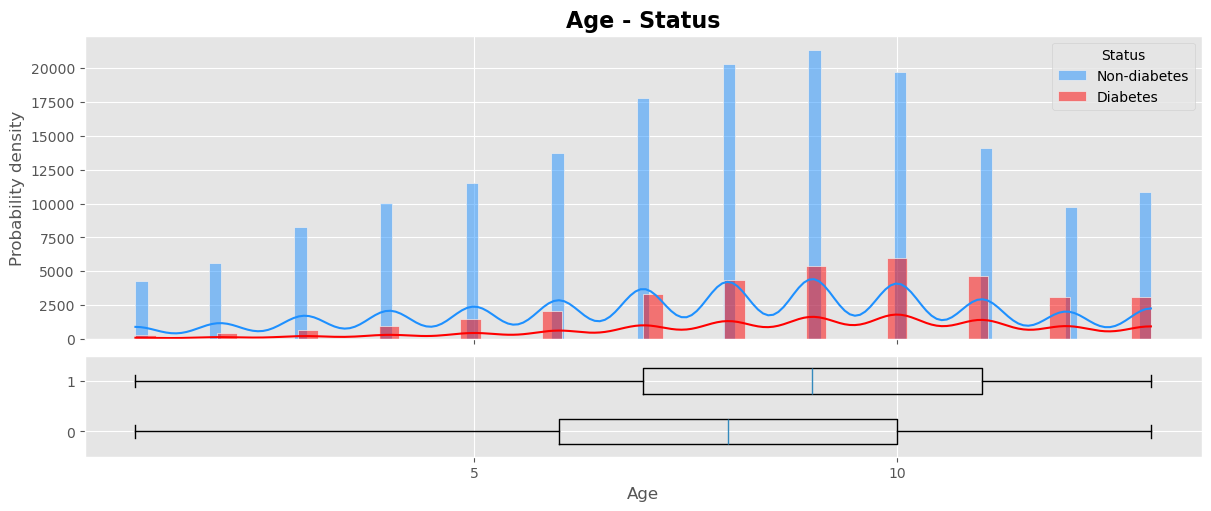

In [59]:
show_distribution_corr("Age", "Status", "Age - Status", "num")


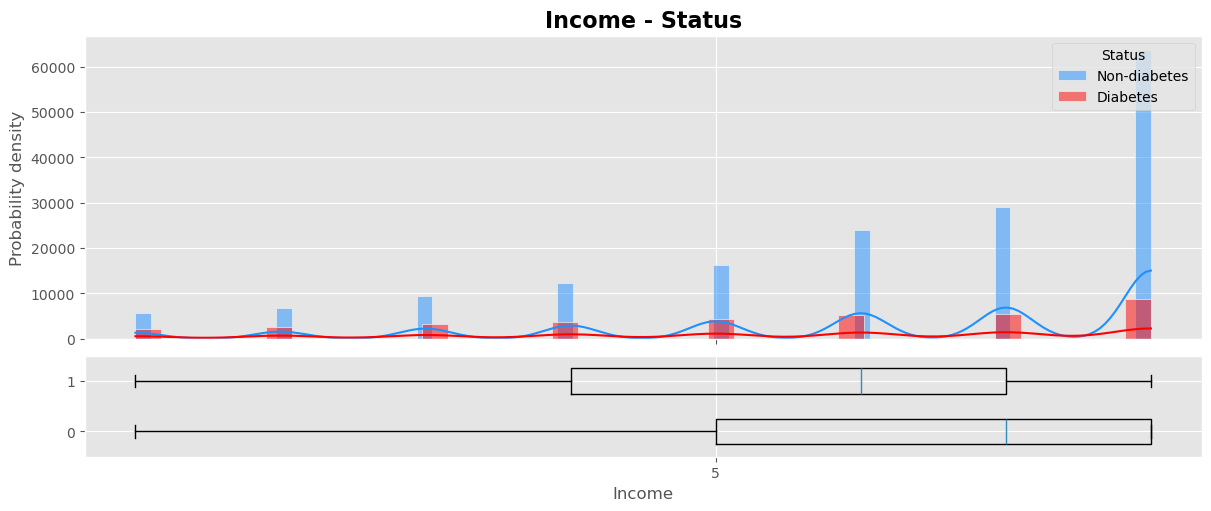

In [60]:
show_distribution_corr("Income", "Status", "Income - Status", "num")


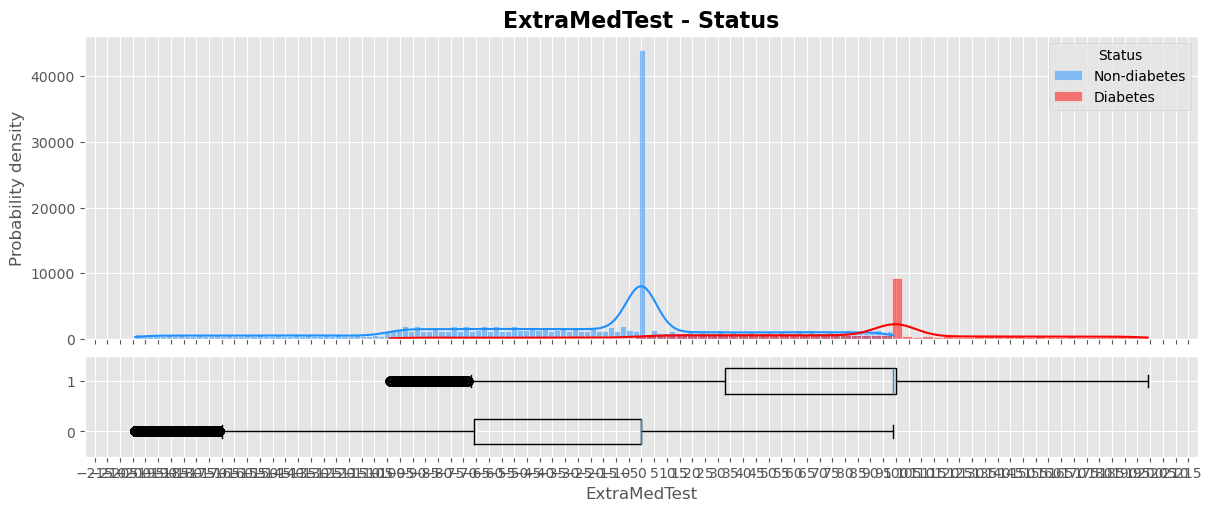

In [61]:
show_distribution_corr("ExtraMedTest", "Status", "ExtraMedTest - Status", "num")


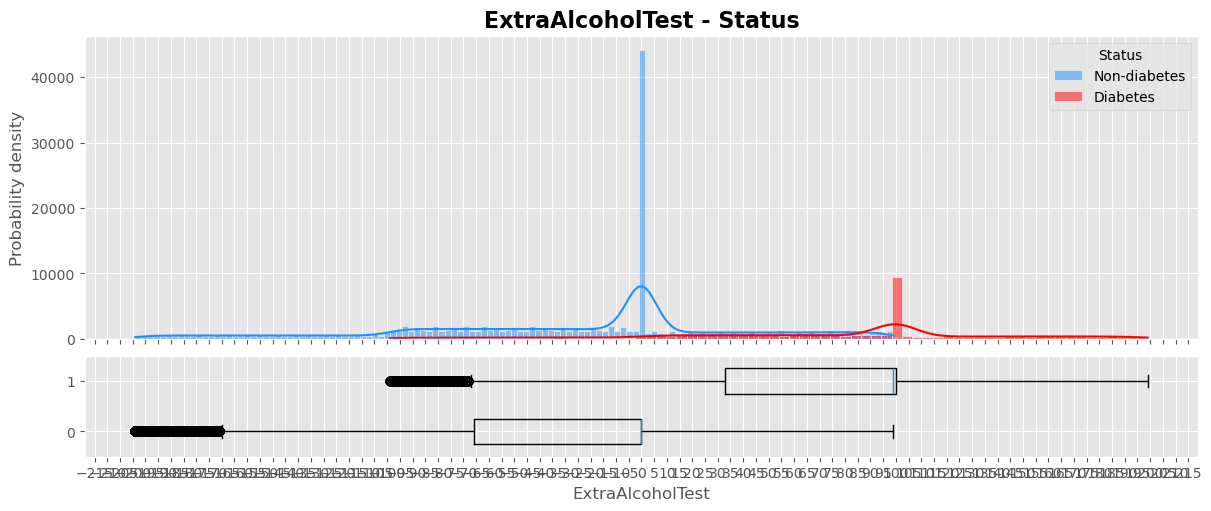

In [62]:
show_distribution_corr("ExtraAlcoholTest", "Status", "ExtraAlcoholTest - Status", "num")
